# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
deepseek_toke = "sk-2cb1e8dc0bad472fa96f4e37a1bb825c"

In [3]:
# Import warnings
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

In [4]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.0
matplotlib version: 3.8.3
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df = pd.read_parquet('/Users/blockhole/Documents/IIITB-lecture-notes/Starter Notebook - EDA NYC Taxi/trip_records/2023-1.parquet')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [26]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/blockhole/Documents/IIITB-lecture-notes/Starter Notebook - EDA NYC Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(file_path)
        # Reading the current file
        current_file_df = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in current_file_df['tpep_pickup_datetime'].dt.date.unique():
            # Filter data for the current date
            date_data = current_file_df[current_file_df['tpep_pickup_datetime'].dt.date == date]

            for hour in range(24):
                # Filter data for the current hour
                hour_data = date_data[date_data['tpep_pickup_datetime'].dt.hour == hour]
                # Sample 5% of the hourly data randomly
                sampled_hour_data = hour_data.sample(frac=0.007, random_state=42)

                # Append sampled data to the dataframe
                sampled_data = pd.concat([sampled_data, sampled_hour_data], ignore_index=True)
            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe
                # sampled_data = # append the sampled_hour_data to the sampled_data dataframe
        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)
        # we initialised this empty DF earlier
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")
print(df.head())

/Users/blockhole/Documents/IIITB-lecture-notes/Starter Notebook - EDA NYC Taxi/trip_records/2023-12.parquet
/Users/blockhole/Documents/IIITB-lecture-notes/Starter Notebook - EDA NYC Taxi/trip_records/2023-6.parquet
/Users/blockhole/Documents/IIITB-lecture-notes/Starter Notebook - EDA NYC Taxi/trip_records/2023-7.parquet
/Users/blockhole/Documents/IIITB-lecture-notes/Starter Notebook - EDA NYC Taxi/trip_records/2023-5.parquet
/Users/blockhole/Documents/IIITB-lecture-notes/Starter Notebook - EDA NYC Taxi/trip_records/2023-11.parquet
/Users/blockhole/Documents/IIITB-lecture-notes/Starter Notebook - EDA NYC Taxi/trip_records/2023-10.parquet
/Users/blockhole/Documents/IIITB-lecture-notes/Starter Notebook - EDA NYC Taxi/trip_records/2023-4.parquet
/Users/blockhole/Documents/IIITB-lecture-notes/Starter Notebook - EDA NYC Taxi/trip_records/2023-1.parquet
/Users/blockhole/Documents/IIITB-lecture-notes/Starter Notebook - EDA NYC Taxi/trip_records/2023-8.parquet
/Users/blockhole/Documents/IIITB-l

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [90]:
df[df['fare_amount']<0.0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee


In [27]:
df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count            8831
trip_distance                 0
RatecodeID                 8831
store_and_fwd_flag         8831
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge       8831
Airport_fee               29613
airport_fee              244705
dtype: int64

In [28]:
df.shape

(265487, 20)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265487 entries, 0 to 265486
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265487 non-null  int64         
 1   tpep_pickup_datetime   265487 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265487 non-null  datetime64[us]
 3   passenger_count        256656 non-null  float64       
 4   trip_distance          265487 non-null  float64       
 5   RatecodeID             256656 non-null  float64       
 6   store_and_fwd_flag     256656 non-null  object        
 7   PULocationID           265487 non-null  int64         
 8   DOLocationID           265487 non-null  int64         
 9   payment_type           265487 non-null  int64         
 10  fare_amount            265487 non-null  float64       
 11  extra                  265487 non-null  float64       
 12  mta_tax                265487 non-null  floa

In [25]:
df.isna().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count           8831
trip_distance                0
RatecodeID                8831
store_and_fwd_flag        8831
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge      8831
Airport_fee              29613
dtype: int64

In [ ]:
# Store the df in csv/parquet
df.to_parquet('NYC-2023-Sampled.parquet')

NameError: name 'df' is not defined

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [177]:
# Load the new data file

NYC_df = pd.read_parquet('/Users/blockhole/Documents/IIITB-lecture-notes/Starter Notebook - EDA NYC Taxi/trip_records/NYC-2023-Sampled.parquet')


In [178]:
NYC_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,N,148,50,1,23.30,1.0,0.5,5.66,0.0,1.0,33.96,2.5,0.0,NaN
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,None,231,61,0,22.43,0.0,0.5,3.00,0.0,1.0,29.43,NaN,NaN,NaN
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,N,161,161,1,10.70,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0,NaN
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,None,137,144,0,17.22,0.0,0.5,0.00,0.0,1.0,21.22,NaN,NaN,NaN
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,N,68,68,1,5.10,1.0,0.5,0.00,0.0,1.0,10.10,2.5,0.0,NaN


In [179]:
NYC_df[NYC_df['airport_fee'].isna()]['airport_fee'].shape

(244705,)

In [180]:
NYC_df[NYC_df['Airport_fee'].isna()]['Airport_fee'].shape

(29613,)

In [181]:
NYC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265487 entries, 0 to 265486
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               265487 non-null  int64         
 1   tpep_pickup_datetime   265487 non-null  datetime64[us]
 2   tpep_dropoff_datetime  265487 non-null  datetime64[us]
 3   passenger_count        256656 non-null  float64       
 4   trip_distance          265487 non-null  float64       
 5   RatecodeID             256656 non-null  float64       
 6   store_and_fwd_flag     256656 non-null  object        
 7   PULocationID           265487 non-null  int64         
 8   DOLocationID           265487 non-null  int64         
 9   payment_type           265487 non-null  int64         
 10  fare_amount            265487 non-null  float64       
 11  extra                  265487 non-null  float64       
 12  mta_tax                265487 non-null  floa

In [182]:
NYC_df.isna().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count            8831
trip_distance                 0
RatecodeID                 8831
store_and_fwd_flag         8831
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge       8831
Airport_fee               29613
airport_fee              244705
dtype: int64

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [183]:
# Fix the index and drop any columns that are not needed
NYC_df.reset_index(drop=True, inplace=True)


In [184]:
NYC_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,N,148,50,1,23.30,1.0,0.5,5.66,0.0,1.0,33.96,2.5,0.0,NaN
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,None,231,61,0,22.43,0.0,0.5,3.00,0.0,1.0,29.43,NaN,NaN,NaN
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,N,161,161,1,10.70,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0,NaN
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,None,137,144,0,17.22,0.0,0.5,0.00,0.0,1.0,21.22,NaN,NaN,NaN
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,N,68,68,1,5.10,1.0,0.5,0.00,0.0,1.0,10.10,2.5,0.0,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [185]:
# Combine the two airport fee columns
NYC_df['airport_combined_fee'] = NYC_df['airport_fee'].combine_first(NYC_df['Airport_fee'])
NYC_df.drop(['airport_fee','Airport_fee'],axis=1,inplace=True)

In [186]:
NYC_df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_combined_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,N,148,50,1,23.30,1.0,0.5,5.66,0.0,1.0,33.96,2.5,0.0
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,NaN,4.79,NaN,None,231,61,0,22.43,0.0,0.5,3.00,0.0,1.0,29.43,NaN,NaN
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,N,161,161,1,10.70,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,NaN,2.08,NaN,None,137,144,0,17.22,0.0,0.5,0.00,0.0,1.0,21.22,NaN,NaN
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,N,68,68,1,5.10,1.0,0.5,0.00,0.0,1.0,10.10,2.5,0.0


**2.1.4** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [187]:
# check where values of fare amount are negative
NYC_df[NYC_df['fare_amount']<0.0]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_combined_fee


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts



In [ ]:
# Find which columns have negative values



In [ ]:
# fix these negative values



### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [188]:
# Find the proportion of missing values in each column
missing_proportion = (NYC_df.isna().sum()/len(NYC_df))*100
missing_proportion


VendorID                 0.00000
tpep_pickup_datetime     0.00000
tpep_dropoff_datetime    0.00000
passenger_count          3.32634
trip_distance            0.00000
RatecodeID               3.32634
store_and_fwd_flag       3.32634
PULocationID             0.00000
DOLocationID             0.00000
payment_type             0.00000
fare_amount              0.00000
extra                    0.00000
mta_tax                  0.00000
tip_amount               0.00000
tolls_amount             0.00000
improvement_surcharge    0.00000
total_amount             0.00000
congestion_surcharge     3.32634
airport_combined_fee     3.32634
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [189]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
NYC_df[NYC_df['passenger_count'].isna()]['passenger_count']

1        NaN
3        NaN
27       NaN
45       NaN
47       NaN
          ..
265212   NaN
265241   NaN
265292   NaN
265424   NaN
265466   NaN
Name: passenger_count, Length: 8831, dtype: float64

In [190]:
median_passenger_count = NYC_df['passenger_count'].median()

In [191]:
round(median_passenger_count,2)

1.0

In [192]:
NYC_df['passenger_count'].fillna(median_passenger_count,inplace=True)

In [193]:
NYC_df[NYC_df['passenger_count'].isna()]['passenger_count']

Series([], Name: passenger_count, dtype: float64)

In [194]:
NYC_df['passenger_count']

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
265482    2.0
265483    2.0
265484    1.0
265485    1.0
265486    1.0
Name: passenger_count, Length: 265487, dtype: float64

Did you find zeroes in passenger_count? Handle these.

In [195]:
NYC_df['passenger_count'].value_counts()

passenger_count
1.0    202229
2.0     38669
3.0      9640
4.0      5340
0.0      4070
5.0      3300
6.0      2234
7.0         2
8.0         2
9.0         1
Name: count, dtype: int64

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [196]:
# Fix missing values in 'RatecodeID'
median_ratecoded_id = NYC_df['RatecodeID'].median()
NYC_df['RatecodeID'].fillna(median_ratecoded_id,inplace=True)

In [197]:
NYC_df['RatecodeID'].isna().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [198]:
# handle null values in congestion_surcharge
median_congestion_surcharge = NYC_df['congestion_surcharge'].median()
NYC_df['congestion_surcharge'].fillna(median_congestion_surcharge,inplace=True)
NYC_df['congestion_surcharge'].isna().sum()


0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [199]:
# Handle any remaining missing values
NYC_df.isna().sum()


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count             0
trip_distance               0
RatecodeID                  0
store_and_fwd_flag       8831
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge        0
airport_combined_fee     8831
dtype: int64

In [200]:
NYC_df['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    255146
Y      1510
Name: count, dtype: int64

In [31]:
NYC_df['store_and_fwd_flag'].mode()

0    N
Name: store_and_fwd_flag, dtype: object

In [201]:
median_store_fwd_flag = NYC_df['store_and_fwd_flag'].mode()[0]
median_airport_fee = NYC_df['airport_combined_fee'].median()
NYC_df['store_and_fwd_flag'].fillna(median_store_fwd_flag, inplace=True)
NYC_df['airport_combined_fee'].fillna(median_airport_fee, inplace=True)
NYC_df.isna().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_combined_fee     0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [202]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
NYC_df.describe(include=[np.number]).T


,count,mean,std,min,25%,50%,75%,max
VendorID,265487.0,1.733475,0.447562,1.00,1.00,2.00,2.00,6.00
passenger_count,265487.0,1.355208,0.878186,0.00,1.00,1.00,1.00,9.00
trip_distance,265487.0,3.581805,48.595892,0.00,1.05,1.80,3.40,22528.82
RatecodeID,265487.0,1.636491,7.422751,1.00,1.00,1.00,1.00,99.00
PULocationID,265487.0,165.172668,64.070411,1.00,132.00,162.00,234.00,265.00
DOLocationID,265487.0,163.952988,69.779730,1.00,113.00,162.00,234.00,265.00
payment_type,265487.0,1.164980,0.506647,0.00,1.00,1.00,1.00,4.00
fare_amount,265487.0,19.830154,18.204986,0.00,9.30,13.50,21.90,910.00
extra,265487.0,1.587679,1.824932,-2.50,0.00,1.00,2.50,14.25
mta_tax,265487.0,0.495325,0.048416,-0.50,0.50,0.50,0.50,0.80


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [203]:
# remove passenger_count > 6
NYC_df['passenger_count'].value_counts()

passenger_count
1.0    202229
2.0     38669
3.0      9640
4.0      5340
0.0      4070
5.0      3300
6.0      2234
7.0         2
8.0         2
9.0         1
Name: count, dtype: int64

In [204]:
NYC_df[NYC_df['passenger_count']>6]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_combined_fee
31536,2,2023-04-09 09:22:54,2023-04-09 09:23:22,7.0,0.00,5.0,N,125,125,1,80.0,0.0,0.5,0.00,21.25,1.0,105.25,2.5,0.0
68548,2,2023-05-29 02:35:04,2023-05-29 02:35:16,7.0,0.00,5.0,N,256,256,1,75.0,0.0,0.0,0.02,0.00,1.0,76.02,0.0,0.0
84916,2,2023-02-19 17:19:13,2023-02-19 17:57:24,9.0,16.79,5.0,N,186,1,1,90.0,0.0,0.0,18.00,14.75,1.0,123.75,0.0,0.0
112986,2,2023-11-30 00:13:36,2023-11-30 00:13:39,8.0,0.00,5.0,N,90,264,1,86.0,0.0,0.5,5.00,0.00,1.0,92.50,0.0,0.0
212011,2,2023-09-18 13:07:26,2023-09-18 14:05:27,8.0,31.71,5.0,N,48,219,1,88.9,0.0,0.5,10.00,11.19,1.0,114.09,2.5,0.0


In [205]:
NYC_df = NYC_df[~(NYC_df['passenger_count']>6)]

In [206]:
NYC_df['passenger_count'].value_counts()

passenger_count
1.0    202229
2.0     38669
3.0      9640
4.0      5340
0.0      4070
5.0      3300
6.0      2234
Name: count, dtype: int64

In [207]:
#Handled the outlier where trip_distance = 0 and fare_amount>300.0
NYC_df = NYC_df[~((NYC_df['trip_distance']==0.0) &(NYC_df['fare_amount'] >300.0))]

In [208]:
NYC_df['RatecodeID'].value_counts()

RatecodeID
1.0     251084
2.0      10081
99.0      1530
5.0       1418
3.0        845
4.0        519
Name: count, dtype: int64

In [209]:
NYC_df[NYC_df['RatecodeID'] == 99.0].shape

(1530, 19)

In [210]:
NYC_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_combined_fee
0,2,2023-12-01 00:27:51,2023-12-01 00:50:12,1.0,3.99,1.0,N,148,50,1,23.30,1.0,0.5,5.66,0.0,1.0,33.96,2.5,0.0
1,2,2023-12-01 00:38:48,2023-12-01 01:01:55,1.0,4.79,1.0,N,231,61,0,22.43,0.0,0.5,3.00,0.0,1.0,29.43,2.5,0.0
2,2,2023-12-01 00:06:19,2023-12-01 00:16:57,1.0,1.05,1.0,N,161,161,1,10.70,1.0,0.5,3.14,0.0,1.0,18.84,2.5,0.0
3,2,2023-12-01 00:00:50,2023-12-01 00:14:37,1.0,2.08,1.0,N,137,144,0,17.22,0.0,0.5,0.00,0.0,1.0,21.22,2.5,0.0
4,2,2023-12-01 00:16:07,2023-12-01 00:19:17,1.0,0.40,1.0,N,68,68,1,5.10,1.0,0.5,0.00,0.0,1.0,10.10,2.5,0.0


In [211]:
# Do any columns need standardising?
filter_1 = (NYC_df['trip_distance'] == 0.0) & (NYC_df['fare_amount'] == 0.0)
filter_3 = NYC_df['PULocationID'] !=NYC_df['DOLocationID']

NYC_df = NYC_df[~(filter_1 &filter_3)]



In [212]:
NYC_df['payment_type'].value_counts()

payment_type
1    209062
2     44450
0      8831
4      1910
3      1220
Name: count, dtype: int64

In [213]:
trip_distance_filter =  NYC_df['trip_distance'] >250
payment_type_filter = NYC_df['payment_type'] == 0
NYC_df = NYC_df[~trip_distance_filter]
NYC_df = NYC_df[~payment_type_filter]
NYC_df[trip_distance_filter]



,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_combined_fee


In [214]:
NYC_df = NYC_df[~((NYC_df['passenger_count'] == 0.0) & (NYC_df['fare_amount']>0.0))]

In [215]:
# filter where tolls_amount >0.0 and trip_distance = 0.0
NYC_df = NYC_df[~((NYC_df['tolls_amount']>0.0) & (NYC_df['trip_distance'] == 0.0))]

In [216]:
NYC_df = NYC_df[~(NYC_df['total_amount']<0)]

In [217]:
NYC_df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
VendorID,252273.0,1.748935,0.433627,1.0,1.00,2.00,2.00,2.00
passenger_count,252273.0,1.389467,0.880384,0.0,1.00,1.00,1.00,6.00
trip_distance,252273.0,3.457026,4.544532,0.0,1.06,1.80,3.39,187.35
RatecodeID,252273.0,1.635867,7.407956,1.0,1.00,1.00,1.00,99.00
PULocationID,252273.0,165.289076,63.772413,1.0,132.00,162.00,234.00,265.00
DOLocationID,252273.0,164.191328,69.732514,1.0,113.00,162.00,234.00,265.00
payment_type,252273.0,1.204394,0.465036,1.0,1.00,1.00,1.00,4.00
fare_amount,252273.0,19.727777,18.127652,0.0,9.30,13.50,21.90,455.20
extra,252273.0,1.611523,1.824547,-2.5,0.00,1.00,2.50,14.25
mta_tax,252273.0,0.495487,0.047362,0.0,0.50,0.50,0.50,0.80


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [218]:
NYC_df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'store_and_fwd_flag',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_combined_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

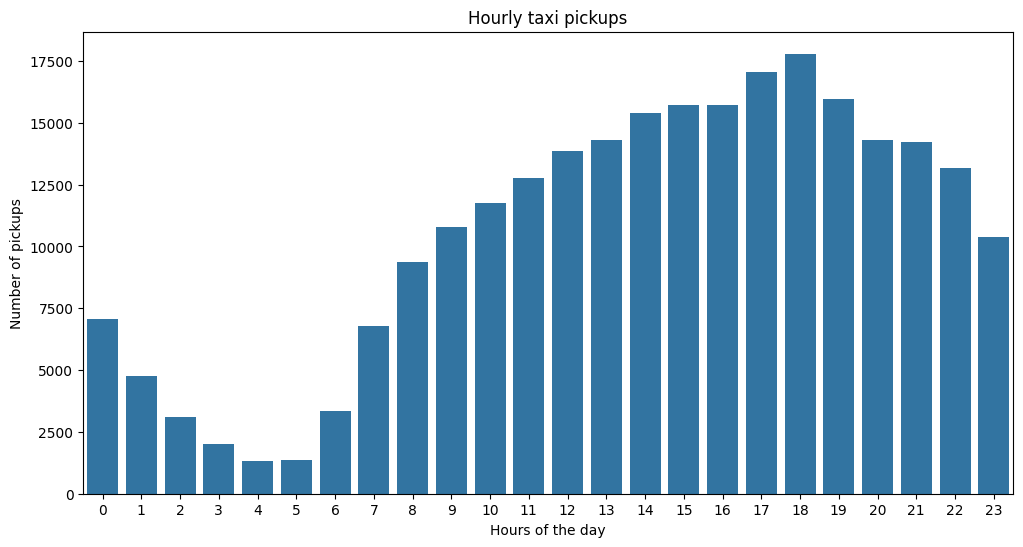

In [219]:
# Find and show the hourly trends in taxi pickups
import seaborn as sns
NYC_df['pickup_hours'] = NYC_df['tpep_pickup_datetime'].dt.hour
hourly_pickups = NYC_df.groupby('pickup_hours').size()
plt.figure(figsize=(12,6))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values)
plt.title('Hourly taxi pickups')
plt.xlabel('Hours of the day')
plt.ylabel('Number of pickups')

plt.show()

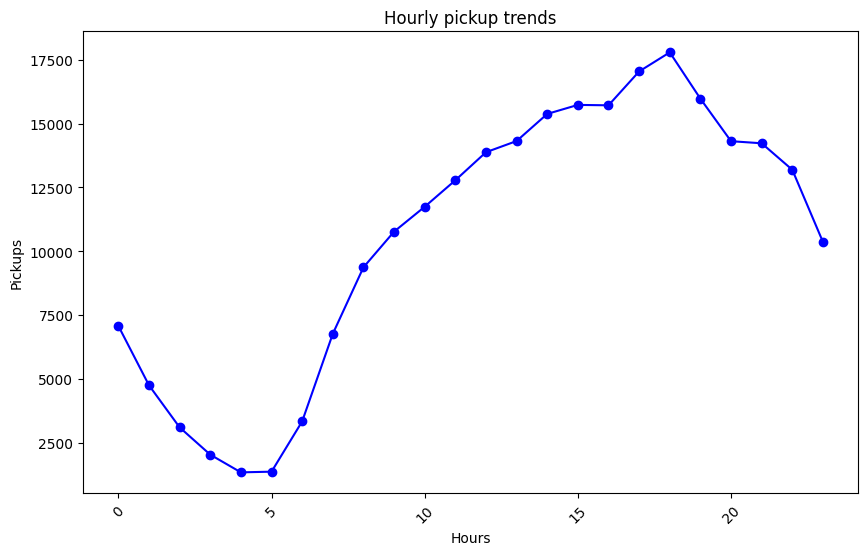

In [220]:
plt.figure(figsize=(10, 6))
plt.plot(hourly_pickups.index,hourly_pickups.values , marker='o', linestyle='-', color='b', label='Total Rides')
plt.title('Hourly pickup trends')
plt.xlabel('Hours')
plt.ylabel('Pickups')
plt.xticks(rotation=45)
plt.show()

In [221]:
NYC_df['monthly_pickup'] = NYC_df['tpep_pickup_datetime'].dt.month_name()
NYC_df['monthly_pickup']

0         December
2         December
4         December
5         December
6         December
            ...   
265482        June
265483        June
265484        June
265485        June
265486        June
Name: monthly_pickup, Length: 252273, dtype: object

In [222]:
import pandas as pd

# Define the correct month order
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]


# Convert 'monthly_pickup' to categorical with a defined order

NYC_df['monthly_pickup'] = pd.Categorical(
    NYC_df['monthly_pickup'], 
    categories=month_order, 
    ordered=True
)

# Sort by the ordered categorical month column
NYC_df = NYC_df.sort_values(by='monthly_pickup')

# Display sorted DataFrame
print(NYC_df['monthly_pickup'])

157879     January
164911     January
164912     January
164913     January
164914     January
            ...   
15631     December
15632     December
15633     December
15625     December
0         December
Name: monthly_pickup, Length: 252273, dtype: category
Categories (12, object): ['January' < 'February' < 'March' < 'April' ... 'September' < 'October' < 'November' < 'December']


[]

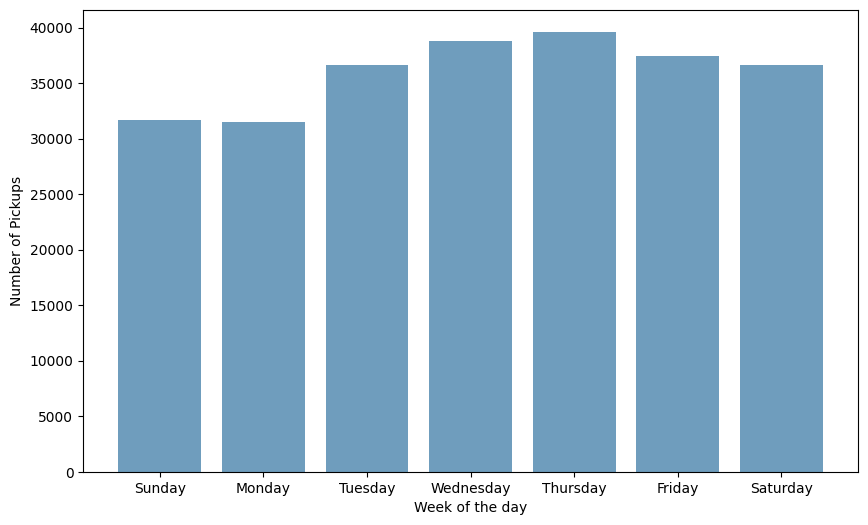

In [223]:
# Find and show the daily trends in taxi pickups (days of the week)
import seaborn as sns
week_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
NYC_df['weekly_pickups'] = NYC_df['tpep_pickup_datetime'].dt.day_name()
NYC_df['weekly_pickups'] = pd.Categorical(NYC_df['weekly_pickups'], categories=week_order, ordered=True)
weekly_pickup = NYC_df.groupby('weekly_pickups').size()
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_pickup.index, y=weekly_pickup.values, alpha=0.7)
plt.xlabel('Week of the day')
plt.ylabel('Number of Pickups')
plt.plot()


In [224]:
weekly_pickup

weekly_pickups
Sunday       31712
Monday       31472
Tuesday      36656
Wednesday    38796
Thursday     39628
Friday       37405
Saturday     36604
dtype: int64

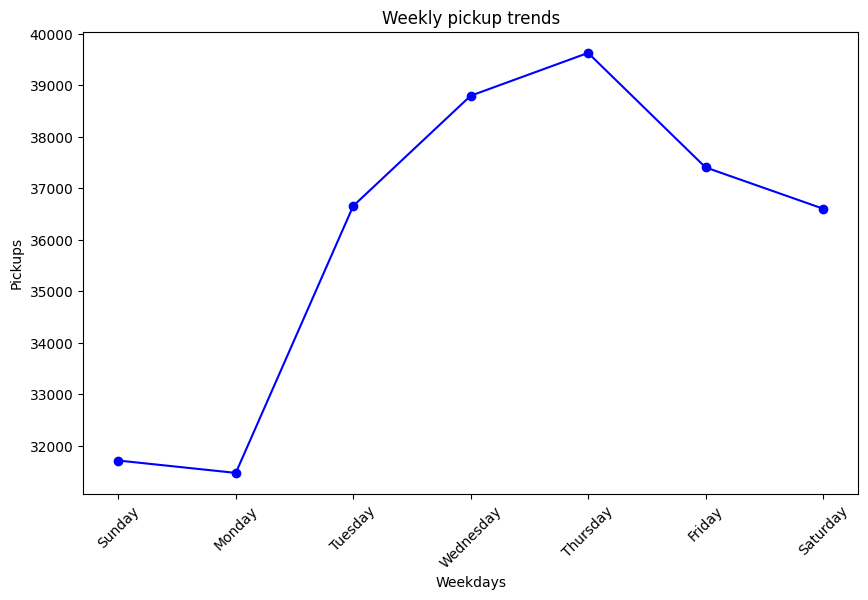

In [225]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_pickup.index,weekly_pickup.values , marker='o', linestyle='-', color='b', label='Total Rides')
plt.title('Weekly pickup trends')
plt.xlabel('Weekdays')
plt.ylabel('Pickups')
plt.xticks(rotation=45)
plt.show()

[]

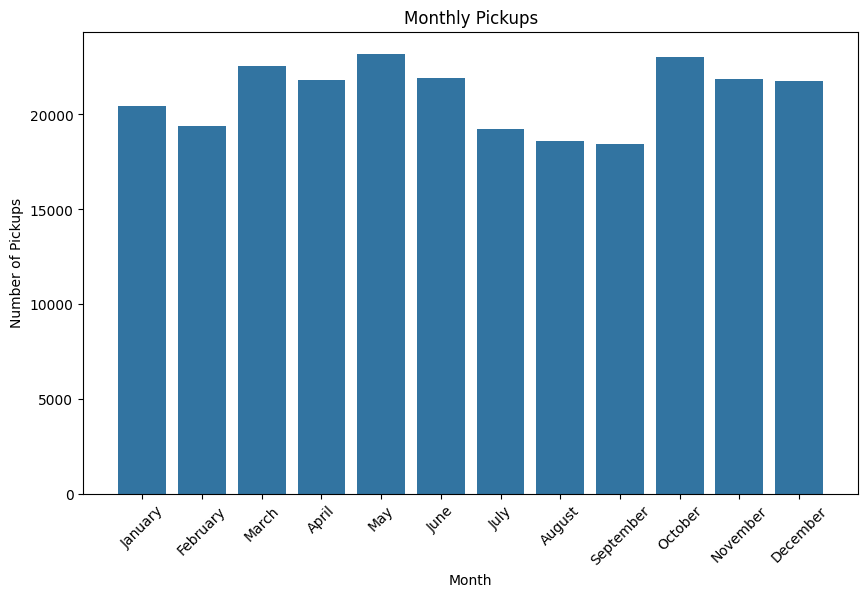

In [226]:
# Show the monthly trends in pickups
# NYC_sorted_df['monthly_pickup'] = NYC_sorted_df['tpep_pickup_datetime'].dt.month_name()
monthly_pickups = NYC_df.groupby('monthly_pickup').size()
plt.figure(figsize=(10,6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values)
plt.title('Monthly Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.plot()

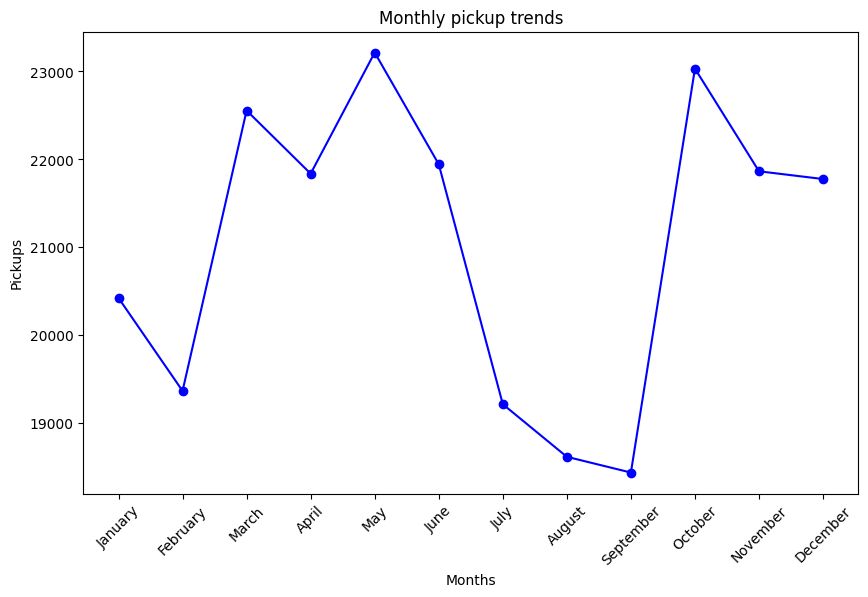

In [227]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_pickups.index,monthly_pickups.values , marker='o', linestyle='-', color='b', label='Total Rides')
plt.title('Monthly pickup trends')
plt.xlabel('Months')
plt.ylabel('Pickups')
plt.xticks(rotation=45)
plt.show()

In [228]:
NYC_df.shape

(252273, 22)

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [229]:
# Analyse the above parameters
NYC_df[['fare_amount','tip_amount','total_amount','trip_distance']].describe().T


,count,mean,std,min,25%,50%,75%,max
fare_amount,252273.0,19.727777,18.127652,0.0,9.30,13.50,21.90,455.20
tip_amount,252273.0,3.582601,4.057423,0.0,1.00,2.86,4.47,150.29
total_amount,252273.0,28.858349,22.770005,0.0,15.96,21.00,30.70,488.70
trip_distance,252273.0,3.457026,4.544532,0.0,1.06,1.80,3.39,187.35


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [230]:
# Create a df with non zero entries for the selected parameters.
NYC_df = NYC_df[(NYC_df['fare_amount'] > 0) & 
                     (NYC_df['tip_amount'] > 0) & 
                     (NYC_df['total_amount'] > 0) & 
                     (NYC_df['trip_distance'] > 0)]
NYC_df.describe().T


,count,mean,min,25%,50%,75%,max,std
VendorID,195049.0,1.756948,1.0,2.0,2.0,2.0,2.0,0.428927
tpep_pickup_datetime,195049,2023-07-02 00:25:12.387528,2023-01-01 00:04:34,2023-04-01 13:42:19,2023-06-25 14:20:36,2023-10-06 22:37:35,2023-12-31 23:53:18,NaN
tpep_dropoff_datetime,195049,2023-07-02 00:42:03.199806,2023-01-01 00:17:32,2023-04-01 14:07:58,2023-06-25 14:40:09,2023-10-06 22:52:03,2024-01-01 20:14:57,NaN
passenger_count,195049.0,1.375203,1.0,1.0,1.0,1.0,6.0,0.87022
trip_distance,195049.0,3.430811,0.01,1.1,1.81,3.35,187.35,4.412769
RatecodeID,195049.0,1.057591,1.0,1.0,1.0,1.0,5.0,0.310297
PULocationID,195049.0,166.609483,1.0,132.0,162.0,234.0,265.0,63.428923
DOLocationID,195049.0,165.732724,1.0,114.0,162.0,236.0,265.0,69.187301
payment_type,195049.0,1.000062,1.0,1.0,1.0,1.0,4.0,0.011545
fare_amount,195049.0,19.372236,3.0,9.3,13.5,21.2,365.6,17.105078


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

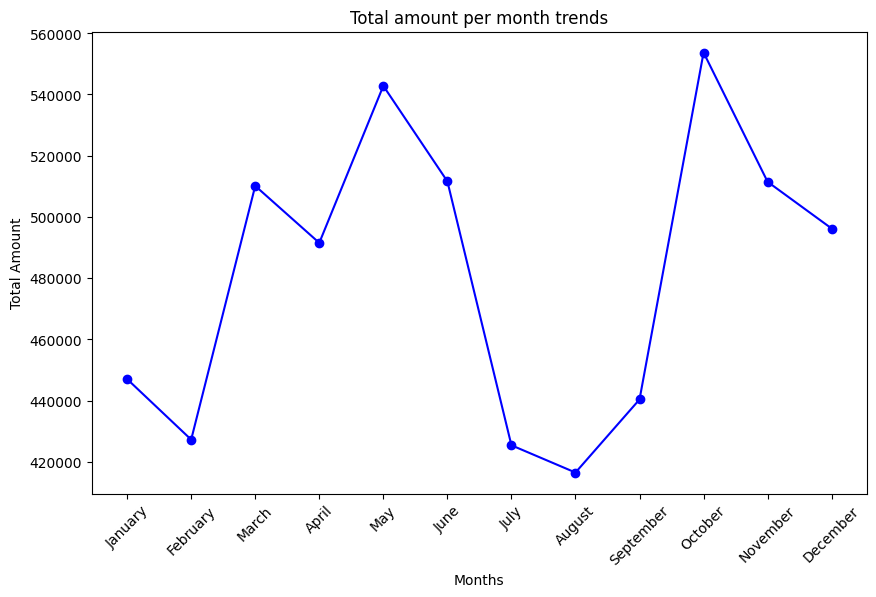

In [231]:
# Group data by month and analyse monthly revenue
monthly_revenue = NYC_df.groupby(['monthly_pickup'])['total_amount'].sum().reset_index()
# sort_by_month = monthly_revenue.sort_values(by='total_amount',ascending=False)

plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.monthly_pickup,monthly_revenue.total_amount , marker='o', linestyle='-', color='b', label='Total Rides')
plt.title('Total amount per month trends')
plt.xlabel('Months')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()


In [232]:
monthly_revenue

,monthly_pickup,total_amount
0,January,447053.59
1,February,427286.82
2,March,510144.45
3,April,491536.07
4,May,542807.50
5,June,511631.66
6,July,425437.44
7,August,416532.96
8,September,440402.75
9,October,553688.52


**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

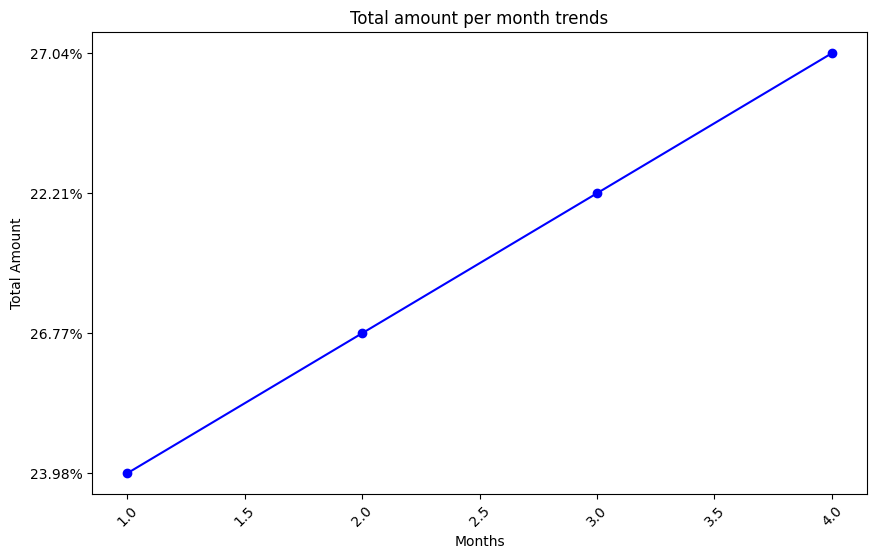

,quater,total_amount,proportion
0,1,1384484.86,23.98%
1,2,1545975.23,26.77%
2,3,1282373.15,22.21%
3,4,1561379.66,27.04%


In [233]:
# Calculate proportion of each quarter
NYC_df['quater'] = NYC_df['tpep_pickup_datetime'].dt.quarter
total_revenue_by_quater = NYC_df.groupby('quater')['total_amount'].sum().reset_index()
total_revenue_by_quater['proportion'] = total_revenue_by_quater['total_amount']/total_revenue_by_quater['total_amount'].sum()
total_revenue_by_quater['proportion'] = total_revenue_by_quater['proportion'].apply(lambda x: '{:.2%}'.format(x))

plt.figure(figsize=(10, 6))
plt.plot(total_revenue_by_quater.quater,total_revenue_by_quater.proportion , marker='o', linestyle='-', color='b', label='Total Rides')
plt.title('Total amount per month trends')
plt.xlabel('Months')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()
total_revenue_by_quater

[]

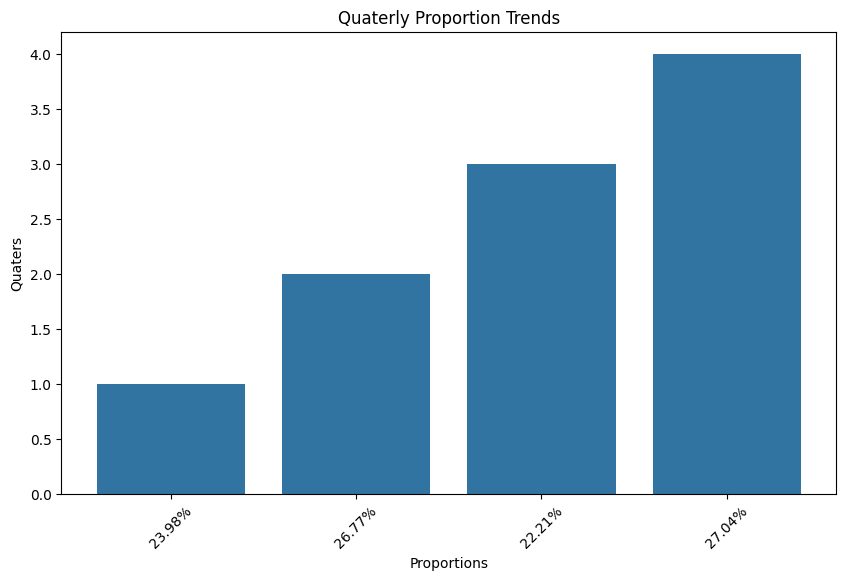

In [234]:
plt.figure(figsize=(10,6))
sns.barplot(y=total_revenue_by_quater.quater, x=total_revenue_by_quater.proportion)
plt.title('Quaterly Proportion Trends')
plt.xlabel('Proportions')
plt.ylabel('Quaters')
plt.xticks(rotation=45)
plt.plot()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [235]:
NYC_df.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,195049.0,1.756948,1.0,2.0,2.0,2.0,2.0,0.428927
tpep_pickup_datetime,195049,2023-07-02 00:25:12.387528,2023-01-01 00:04:34,2023-04-01 13:42:19,2023-06-25 14:20:36,2023-10-06 22:37:35,2023-12-31 23:53:18,NaN
tpep_dropoff_datetime,195049,2023-07-02 00:42:03.199806,2023-01-01 00:17:32,2023-04-01 14:07:58,2023-06-25 14:40:09,2023-10-06 22:52:03,2024-01-01 20:14:57,NaN
passenger_count,195049.0,1.375203,1.0,1.0,1.0,1.0,6.0,0.87022
trip_distance,195049.0,3.430811,0.01,1.1,1.81,3.35,187.35,4.412769
RatecodeID,195049.0,1.057591,1.0,1.0,1.0,1.0,5.0,0.310297
PULocationID,195049.0,166.609483,1.0,132.0,162.0,234.0,265.0,63.428923
DOLocationID,195049.0,165.732724,1.0,114.0,162.0,236.0,265.0,69.187301
payment_type,195049.0,1.000062,1.0,1.0,1.0,1.0,4.0,0.011545
fare_amount,195049.0,19.372236,3.0,9.3,13.5,21.2,365.6,17.105078


In [236]:
# Show how trip fare is affected by distance
NYC_df[['trip_distance','fare_amount']].corr()



,trip_distance,fare_amount
trip_distance,1.000000,0.947688
fare_amount,0.947688,1.000000


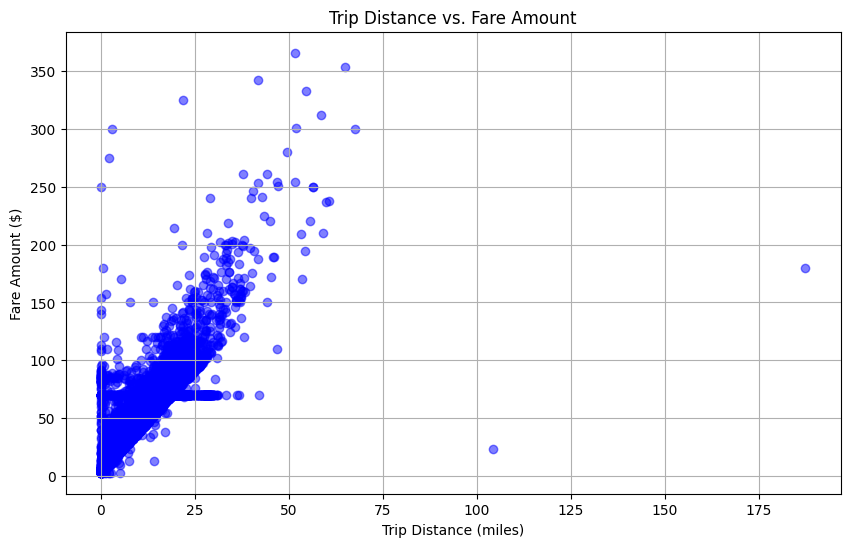

In [237]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(NYC_df['trip_distance'], NYC_df['fare_amount'], alpha=0.5, color='b')
plt.title('Trip Distance vs. Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [238]:
import seaborn as sns

# Calculate trip duration in minutes
NYC_df['trip_duration'] = (NYC_df['tpep_dropoff_datetime'] - NYC_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Calculate correlations
correlation_fare_duration = NYC_df['fare_amount'].corr(NYC_df['trip_duration'])
correlation_fare_passenger = NYC_df['fare_amount'].corr(NYC_df['passenger_count'])
correlation_tip_distance = NYC_df['tip_amount'].corr(NYC_df['trip_distance'])

print(f"Correlation between fare_amount and trip_duration: {correlation_fare_duration}")
print(f"Correlation between fare_amount and passenger_count: {correlation_fare_passenger}")
print(f"Correlation between tip_amount and trip_distance: {correlation_tip_distance}")


Correlation between fare_amount and trip_duration: 0.3313284959037335
Correlation between fare_amount and passenger_count: 0.03750075149578085
Correlation between tip_amount and trip_distance: 0.7983325501390416


Text(0, 0.5, 'Fare Amount ($)')

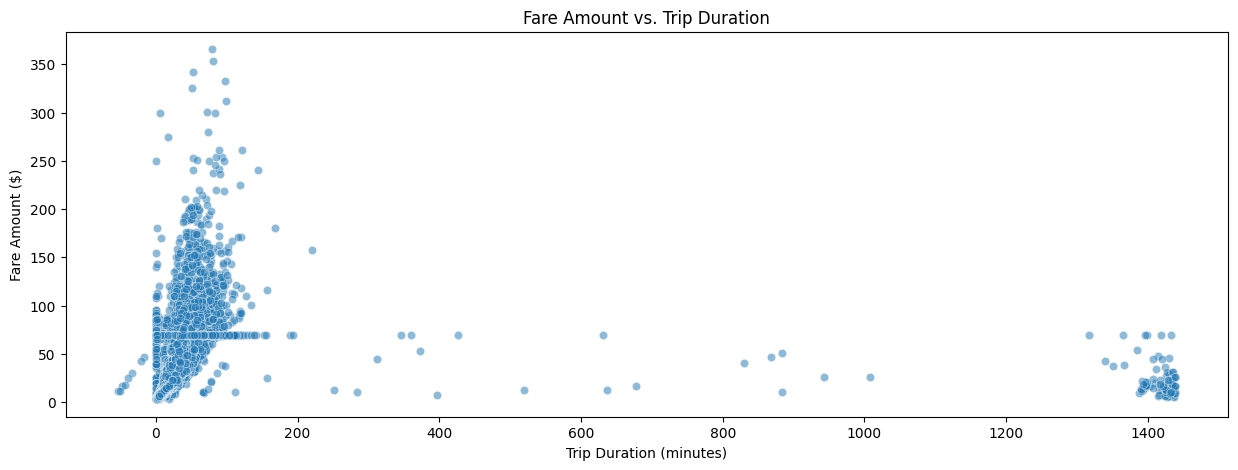

In [239]:
# Show relationship between fare and trip duration
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# Scatter plot for fare_amount and trip_duration
sns.scatterplot(x='trip_duration', y='fare_amount', data=NYC_df, alpha=0.5)
plt.title('Fare Amount vs. Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Fare Amount ($)')


Text(0, 0.5, 'Fare Amount ($)')

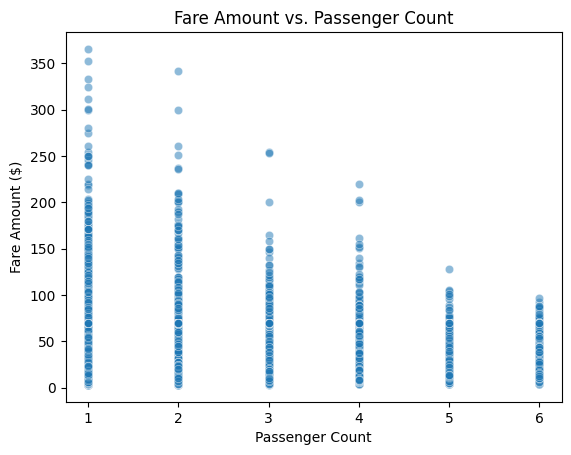

In [240]:
# Show relationship between fare and number of passengers
sns.scatterplot(x='passenger_count', y='fare_amount', data=NYC_df, alpha=0.5)
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')


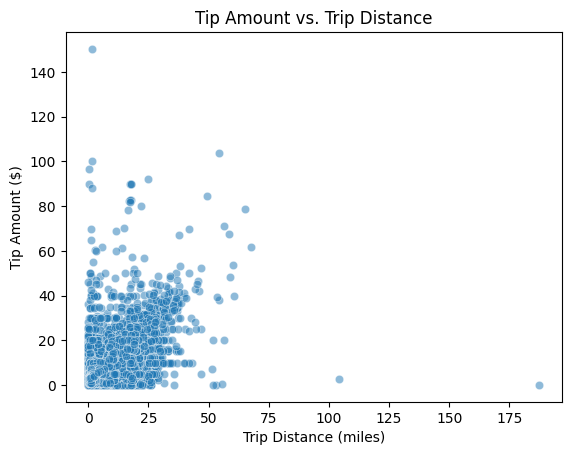

In [241]:
# Show relationship between tip and trip distance

sns.scatterplot(x='trip_distance', y='tip_amount', data=NYC_df, alpha=0.5)
plt.title('Tip Amount vs. Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Amount ($)')

plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

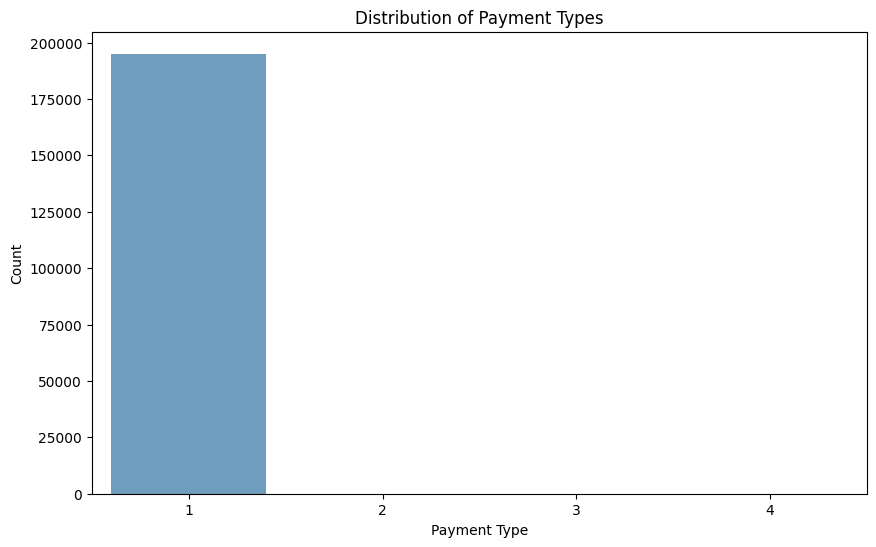

In [242]:
# Count the occurrences of each payment type
payment_type_counts = NYC_df['payment_type'].value_counts()

# Plot the distribution of payment types
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_type_counts.index, y=payment_type_counts.values, alpha=0.7)
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

In [243]:
# Analyse the distribution of different payment types (payment_type).

payment_type_counts


payment_type
1    195042
2         4
4         2
3         1
Name: count, dtype: int64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [460]:
!pip3 install geopandas

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 323 kB 5.8 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 15.1 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 3.2 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [77]:
import geopandas as gpd


# Read the shapefile using geopandas
zones = gpd.read_file('/Users/blockhole/Documents/IIITB-lecture-notes/Starter Notebook - EDA NYC Taxi/taxi_zones/taxi_zones.shp')# read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   OBJECTID      263 non-null    int32   
 1   Shape_Leng    263 non-null    float64 
 2   Shape_Area    263 non-null    float64 
 3   zone          263 non-null    object  
 4   PULocationID  263 non-null    int32   
 5   borough       263 non-null    object  
 6   geometry      263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

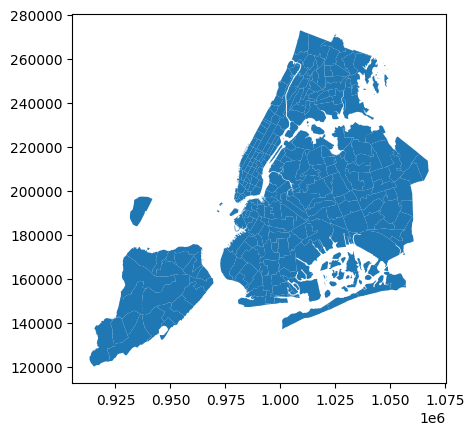

In [244]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [245]:
NYC_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_combined_fee',
       'pickup_hours', 'monthly_pickup', 'weekly_pickups', 'quater',
       'trip_duration'],
      dtype='object')

In [246]:
zones.rename(columns={'LocationID':'PULocationID'},inplace=True)

In [247]:
zones

,OBJECTID,Shape_Leng,Shape_Area,zone,PULocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."
...,...,...,...,...,...,...,...
258,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx,"POLYGON ((1025414.782 270986.139, 1025138.624 ..."
259,260,0.133514,0.000422,Woodside,260,Queens,"POLYGON ((1011466.966 216463.005, 1011545.889 ..."
260,261,0.027120,0.000034,World Trade Center,261,Manhattan,"POLYGON ((980555.204 196138.486, 980570.792 19..."
261,262,0.049064,0.000122,Yorkville East,262,Manhattan,"MULTIPOLYGON (((999804.795 224498.527, 999824...."


In [248]:
# Merge zones and trip records using locationID and PULocationID
merged_df = pd.merge(NYC_df,zones,how='left',on='PULocationID')


In [249]:
merged_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,monthly_pickup,weekly_pickups,quater,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry
0,2,2023-01-01 02:51:09,2023-01-01 03:08:27,2.0,4.42,1.0,N,48,75,1,...,January,Sunday,1,17.300000,48.0,0.043747,0.000094,Clinton East,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21..."
1,2,2023-01-12 08:29:12,2023-01-12 08:52:25,1.0,6.91,1.0,N,88,140,1,...,January,Thursday,1,23.216667,88.0,0.035205,0.000057,Financial District South,Manhattan,"POLYGON ((981547.706 196045.255, 981628.588 19..."
2,1,2023-01-12 08:34:40,2023-01-12 08:52:30,1.0,4.90,1.0,N,170,88,1,...,January,Thursday,1,17.833333,170.0,0.045769,0.000074,Murray Hill,Manhattan,"POLYGON ((991999.299 210994.739, 991972.635 21..."
3,2,2023-01-12 08:40:51,2023-01-12 09:15:02,1.0,11.27,1.0,N,48,138,1,...,January,Thursday,1,34.183333,48.0,0.043747,0.000094,Clinton East,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21..."
4,2,2023-01-12 08:22:41,2023-01-12 08:37:44,3.0,2.54,1.0,N,144,161,1,...,January,Thursday,1,15.050000,144.0,0.027620,0.000047,Little Italy/NoLiTa,Manhattan,"POLYGON ((985411.76 200369.518, 985342.573 200..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195047,2,2023-12-19 10:41:18,2023-12-19 10:55:01,1.0,1.89,1.0,N,142,161,1,...,December,Tuesday,4,13.716667,142.0,0.038176,0.000076,Lincoln Square East,Manhattan,"POLYGON ((989380.305 218980.247, 989359.803 21..."
195048,2,2023-12-19 10:33:34,2023-12-19 10:47:12,1.0,2.02,1.0,N,236,162,1,...,December,Tuesday,4,13.633333,236.0,0.044252,0.000103,Upper East Side North,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220..."
195049,2,2023-12-19 10:14:01,2023-12-19 10:18:16,1.0,0.64,1.0,N,234,234,1,...,December,Tuesday,4,4.250000,234.0,0.036072,0.000073,Union Sq,Manhattan,"POLYGON ((987029.847 207022.299, 987048.27 206..."
195050,1,2023-12-19 10:51:33,2023-12-19 11:09:39,1.0,2.40,1.0,N,161,43,1,...,December,Tuesday,4,18.100000,161.0,0.035804,0.000072,Midtown Center,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [250]:
# Group data by location and calculate the number of trips
group_by_location = merged_df.groupby('PULocationID').size().reset_index(name='Total Trips')
group_by_location


,PULocationID,Total Trips
0,1,4
1,4,184
2,6,1
3,7,31
4,9,1
...,...,...
146,261,981
147,262,2612
148,263,3821
149,264,1644


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

<Figure size 1500x1000 with 0 Axes>

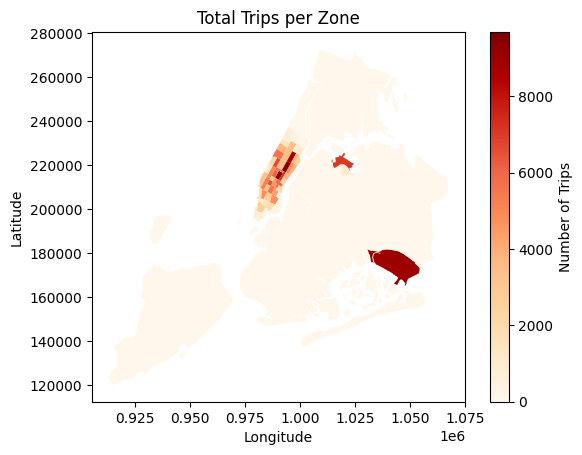

In [251]:
# Merge trip counts back to the zones GeoDataFrame

zones_with_trips = zones.merge(group_by_location, on='PULocationID', how='left')
zones_with_trips['Total Trips'] = zones_with_trips['Total Trips'].fillna(0)
# Plot the map showing total trips per zone
plt.figure(figsize=(15, 10))
zones_with_trips.plot(column='Total Trips', cmap='OrRd', legend=True, legend_kwds={'label': "Number of Trips"})
plt.title('Total Trips per Zone')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

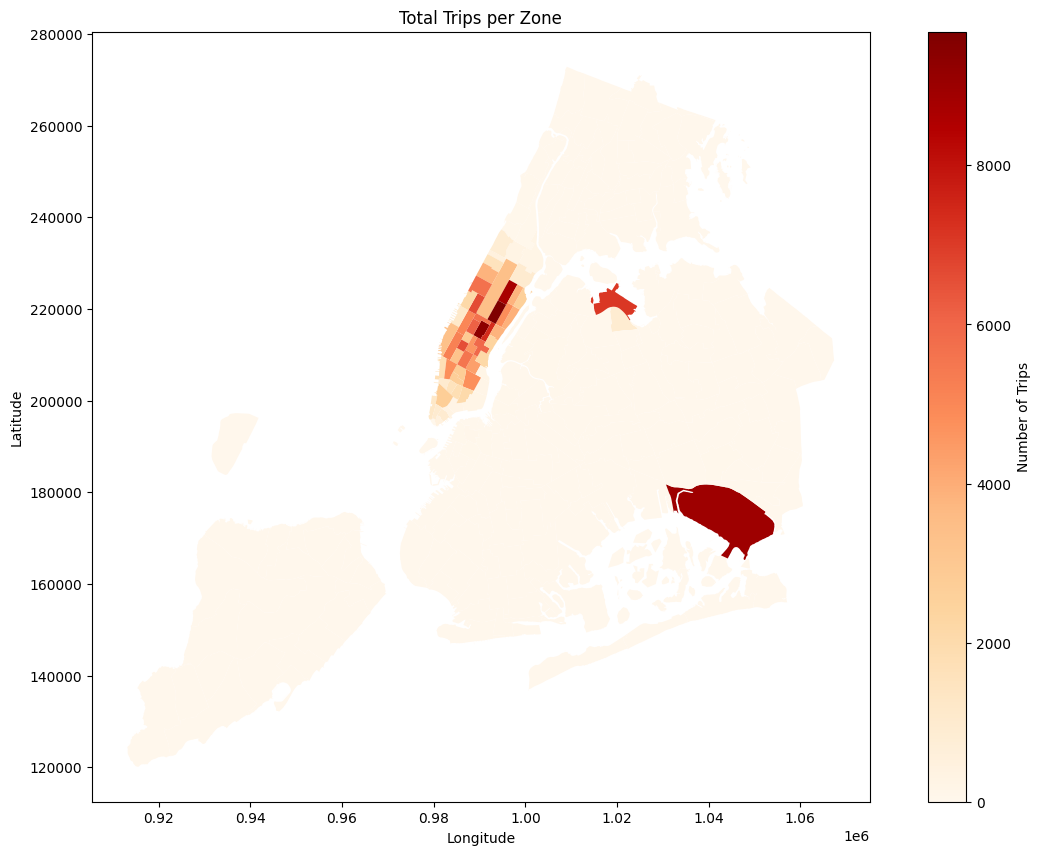

In [252]:
# Define figure and axis
import matplotlib.pyplot as plt
import geopandas as gpd

# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the choropleth map
zones_with_trips.plot(column='Total Trips', cmap='OrRd', legend=True,
                      legend_kwds={'label': "Number of Trips"}, ax=ax)

# Add title and labels
plt.title('Total Trips per Zone')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()


# Plot the map and display it



In [253]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones_with_trips.sort_values(by="Total Trips", ascending=False)
zones_sorted

,OBJECTID,Shape_Leng,Shape_Area,zone,PULocationID,borough,geometry,Total Trips
236,237,0.042213,0.000096,Upper East Side South,237,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21...",9679.0
160,161,0.035804,0.000072,Midtown Center,161,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21...",9306.0
131,132,0.245479,0.002038,JFK Airport,132,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",8945.0
235,236,0.044252,0.000103,Upper East Side North,236,Manhattan,"POLYGON ((995940.048 221122.92, 995812.322 220...",8713.0
161,162,0.035270,0.000048,Midtown East,162,Manhattan,"POLYGON ((992224.354 214415.293, 992096.999 21...",7353.0
...,...,...,...,...,...,...,...,...
146,147,0.058765,0.000106,Longwood,147,Bronx,"POLYGON ((1013266.371 240896.958, 1013354.947 ...",0.0
148,149,0.083681,0.000271,Madison,149,Brooklyn,"POLYGON ((999782.783 162246.843, 999853.961 16...",0.0
152,153,0.024737,0.000032,Marble Hill,153,Manhattan,"POLYGON ((1010061.703 258338.334, 1009990.141 ...",0.0
153,154,0.227332,0.001790,Marine Park/Floyd Bennett Field,154,Brooklyn,"MULTIPOLYGON (((1002211.414 161107.153, 100251...",0.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


## Findings from General analysis

1. Busiest Hours & Days
Analysis of the hourly trends shows that taxi pickups peak during rush hours (typically early morning and late afternoon/evening). Weekdays tend to have higher volumes compared to weekends, indicating commuter patterns dominate.

2. Monthly & Quarterly Trends in Revenue
The financial analysis reveals that revenue exhibits seasonal patterns with noticeable peaks in specific months. Quarterly aggregation shows varied revenue proportions with some quarters driving a higher share of the total revenue, likely reflecting seasonal tourism or commuter fluctuations.

3. Fare Dependence on Trip Attributes
- Trip Distance & Duration: There is a clear positive relationship where longer distances and durations result in higher fares.
- Passenger Count: While the fare generally scales with distance, trips with higher passenger counts may indicate shared rides or peak-time dynamics influencing pricing.

4. Tip Amount and Trip Distance
The correlation analysis suggests that longer trips tend to garner higher tip amounts. This could reflect both a higher base fare and the tendency for passengers to tip more on longer journeys.

5. Busiest Zones
The geographical analysis using the choropleth map of taxi zones (sorted by total trips) identifies key pickup areas with the highest trip density. These zones are typically located in commercial or transit hubs, highlighting urban centers of activity.

#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [254]:
merged_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_combined_fee',
       'pickup_hours', 'monthly_pickup', 'weekly_pickups', 'quater',
       'trip_duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'borough', 'geometry'],
      dtype='object')

In [255]:
# Find routes which have the slowest speeds at different times of the day
merged_df.head(5)
merged_df['trip_duration_hours'] = merged_df['trip_duration']/60


In [256]:
merged_df.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,weekly_pickups,quater,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry,trip_duration_hours
0,2,2023-01-01 02:51:09,2023-01-01 03:08:27,2.0,4.42,1.0,N,48,75,1,...,Sunday,1,17.300000,48.0,0.043747,0.000094,Clinton East,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...",0.288333
1,2,2023-01-12 08:29:12,2023-01-12 08:52:25,1.0,6.91,1.0,N,88,140,1,...,Thursday,1,23.216667,88.0,0.035205,0.000057,Financial District South,Manhattan,"POLYGON ((981547.706 196045.255, 981628.588 19...",0.386944
2,1,2023-01-12 08:34:40,2023-01-12 08:52:30,1.0,4.90,1.0,N,170,88,1,...,Thursday,1,17.833333,170.0,0.045769,0.000074,Murray Hill,Manhattan,"POLYGON ((991999.299 210994.739, 991972.635 21...",0.297222
3,2,2023-01-12 08:40:51,2023-01-12 09:15:02,1.0,11.27,1.0,N,48,138,1,...,Thursday,1,34.183333,48.0,0.043747,0.000094,Clinton East,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...",0.569722
4,2,2023-01-12 08:22:41,2023-01-12 08:37:44,3.0,2.54,1.0,N,144,161,1,...,Thursday,1,15.050000,144.0,0.027620,0.000047,Little Italy/NoLiTa,Manhattan,"POLYGON ((985411.76 200369.518, 985342.573 200...",0.250833


In [257]:
route_stats = merged_df.groupby(['PULocationID', 'DOLocationID', 'pickup_hours']).agg(
    avg_duration=('trip_duration', 'mean'),
    avg_distance=('trip_distance', 'mean')
).reset_index()

# Calculate the average speed (in mph)
# Note: trip_duration is in minutes, so we multiply by 60 to convert to mph.
route_stats['speed_mph'] = (route_stats['avg_distance'] / route_stats['avg_duration']) * 60

# Display the results
route_stats.head()

,PULocationID,DOLocationID,pickup_hours,avg_duration,avg_distance,speed_mph
0,1,1,6,0.116667,0.01,5.142857
1,1,1,11,1.950000,0.01,0.307692
2,1,1,13,0.183333,0.01,3.272727
3,1,265,16,0.233333,0.07,18.000000
4,4,4,1,4.850000,0.52,6.432990


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

Busiest hour: 18.0 with approx. 2028571 trips.


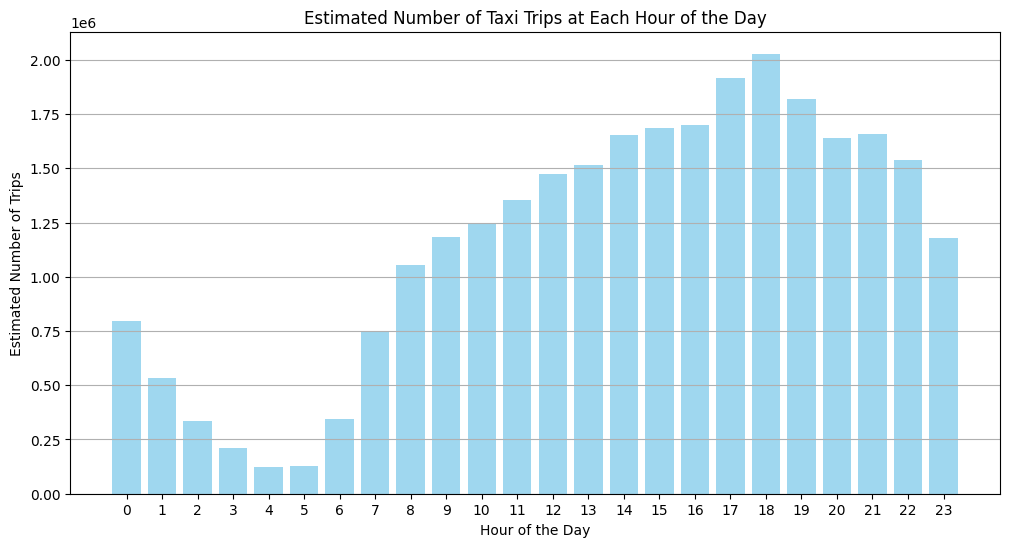

In [258]:
# Visualise the number of trips per hour and find the busiest hour
import matplotlib.pyplot as plt

# Define the sampling fraction used when creating the sample
sampling_fraction = 0.007

# Calculate the observed number of trips for each hour from the sampled data
trips_by_hour = NYC_df.groupby('pickup_hours').size().reset_index(name='sampled_trips')

# Scale up the sampled number to estimate the actual number of trips
trips_by_hour['actual_trips'] = trips_by_hour['sampled_trips'] / sampling_fraction

# Identify the busiest hour from the estimated actual trip counts
busiest = trips_by_hour.loc[trips_by_hour['actual_trips'].idxmax()]
print(f"Busiest hour: {busiest['pickup_hours']} with approx. {int(busiest['actual_trips'])} trips.")

# Visualize the number of trips at each hour (scaled up)
plt.figure(figsize=(12, 6))
plt.bar(trips_by_hour['pickup_hours'], trips_by_hour['actual_trips'], color='skyblue', alpha=0.8)
plt.xlabel('Hour of the Day')
plt.ylabel('Estimated Number of Trips')
plt.title('Estimated Number of Taxi Trips at Each Hour of the Day')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

5 Busiest Hours and their estimated actual trip counts:
    pickup_hours  actual_trips
18            18  2.028571e+06
17            17  1.915000e+06
19            19  1.822000e+06
16            16  1.700000e+06
15            15  1.687286e+06


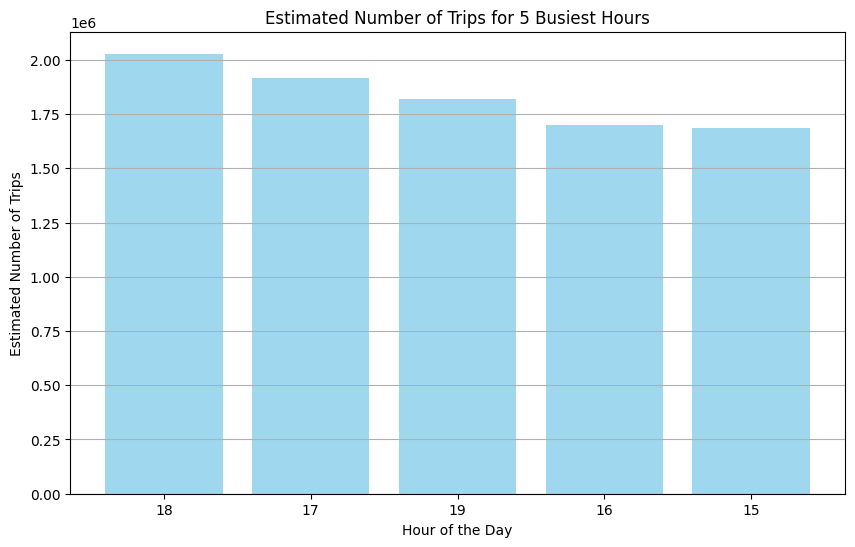

In [259]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
import matplotlib.pyplot as plt

# Define the sampling fraction used when creating the sample
sampling_fraction = 0.007

# Calculate the observed number of trips for each hour from the sampled data
trips_by_hour = NYC_df.groupby('pickup_hours').size().reset_index(name='sampled_trips')

# Scale up the sampled numbers to get the estimated actual number of trips
trips_by_hour['actual_trips'] = trips_by_hour['sampled_trips'] / sampling_fraction

# Find the 5 busiest hours based on estimated actual trip counts
busiest_5 = trips_by_hour.nlargest(5, 'actual_trips')

print("5 Busiest Hours and their estimated actual trip counts:")
print(busiest_5[['pickup_hours', 'actual_trips']])

# Optionally, visualize them
plt.figure(figsize=(10, 6))
plt.bar(busiest_5['pickup_hours'].astype(str), busiest_5['actual_trips'], color='skyblue', alpha=0.8)
plt.xlabel('Hour of the Day')
plt.ylabel('Estimated Number of Trips')
plt.title('Estimated Number of Trips for 5 Busiest Hours')
plt.grid(axis='y')
plt.show()


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [260]:
NYC_df['weekly_pickups']

157879      Sunday
164911    Thursday
164912    Thursday
164913    Thursday
164915    Thursday
            ...   
15631      Tuesday
15632      Tuesday
15633      Tuesday
15625      Tuesday
0           Friday
Name: weekly_pickups, Length: 195049, dtype: category
Categories (7, object): ['Sunday' < 'Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday']

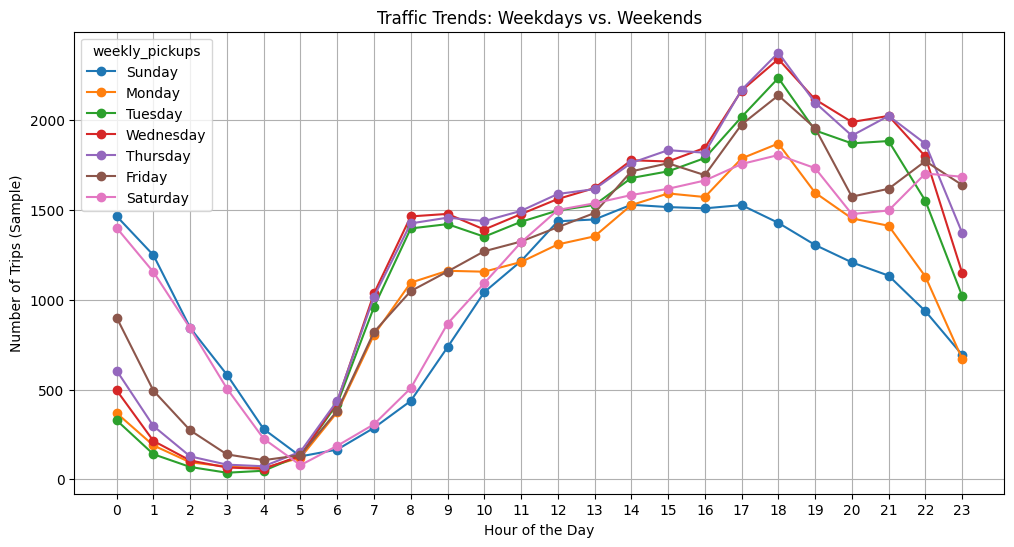

In [261]:
# Compare traffic trends for the week days and weekends
import matplotlib.pyplot as plt

# Group by pickup_hour and weekly_pickups, and count the number of trips
trips_by_hour_day_type = NYC_df.groupby(['pickup_hours', 'weekly_pickups']).size().reset_index(name='trip_count')

# Pivot the data so that each day type becomes a separate column
pivoted = trips_by_hour_day_type.pivot(index='pickup_hours', columns='weekly_pickups', values='trip_count')

# Plot the line chart for both weekdays and weekends
plt.figure(figsize=(12, 6))
pivoted.plot(kind='line', marker='o', ax=plt.gca())
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips (Sample)')
plt.title('Traffic Trends: Weekdays vs. Weekends')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

From the given traffic trend graph, we can infer the following patterns:

### **Observations:**
1. **Morning Dip:** 
   - The number of trips is lowest between **2 AM to 5 AM** across all days, indicating that these are the least busy hours for transportation.
   
2. **Morning Peak (Rush Hour):** 
   - A steep rise in trips starts around **6 AM**, peaking around **8-9 AM**, which aligns with morning commute times.

3. **Afternoon Steady Increase:**  
   - There is a gradual increase in trips from **12 PM to 4 PM**, with a sharper rise in the evening.

4. **Evening Peak (Rush Hour):**  
   - The busiest period occurs between **5 PM to 7 PM**, likely due to people commuting back home from work.

5. **Weekend vs. Weekday Differences:**
   - **Weekends (Saturday, Sunday)** show a more spread-out traffic pattern, with Sunday having lower trip counts.
   - **Weekdays (Monday-Friday)** have a clear two-peak structure (morning and evening rush).

6. **Late Night Decline:**  
   - Trips gradually decrease after **9 PM**, reaching a low around **midnight**.


**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [262]:
merged_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,weekly_pickups,quater,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,borough,geometry,trip_duration_hours
0,2,2023-01-01 02:51:09,2023-01-01 03:08:27,2.0,4.42,1.0,N,48,75,1,...,Sunday,1,17.300000,48.0,0.043747,0.000094,Clinton East,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...",0.288333
1,2,2023-01-12 08:29:12,2023-01-12 08:52:25,1.0,6.91,1.0,N,88,140,1,...,Thursday,1,23.216667,88.0,0.035205,0.000057,Financial District South,Manhattan,"POLYGON ((981547.706 196045.255, 981628.588 19...",0.386944
2,1,2023-01-12 08:34:40,2023-01-12 08:52:30,1.0,4.90,1.0,N,170,88,1,...,Thursday,1,17.833333,170.0,0.045769,0.000074,Murray Hill,Manhattan,"POLYGON ((991999.299 210994.739, 991972.635 21...",0.297222
3,2,2023-01-12 08:40:51,2023-01-12 09:15:02,1.0,11.27,1.0,N,48,138,1,...,Thursday,1,34.183333,48.0,0.043747,0.000094,Clinton East,Manhattan,"POLYGON ((986694.313 214463.846, 986568.184 21...",0.569722
4,2,2023-01-12 08:22:41,2023-01-12 08:37:44,3.0,2.54,1.0,N,144,161,1,...,Thursday,1,15.050000,144.0,0.027620,0.000047,Little Italy/NoLiTa,Manhattan,"POLYGON ((985411.76 200369.518, 985342.573 200...",0.250833


In [263]:
merged_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_combined_fee',
       'pickup_hours', 'monthly_pickup', 'weekly_pickups', 'quater',
       'trip_duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'borough', 'geometry', 'trip_duration_hours'],
      dtype='object')

In [264]:
# Find top 10 pickup and dropoff zones
high_hourly_pickups = merged_df.groupby(['PULocationID','zone','pickup_hours']).size().reset_index(name='total_pickups_hourly')
top_10_hourly_pickups = high_hourly_pickups.nlargest(10, 'total_pickups_hourly')
print("Top 10 Pickup Zones with the Highest Hourly Pickups:")
print(top_10_hourly_pickups[['zone','total_pickups_hourly','pickup_hours']])

Top 10 Pickup Zones with the Highest Hourly Pickups:
                       zone  total_pickups_hourly  pickup_hours
1215         Midtown Center                   854            18
1214         Midtown Center                   846            17
1761  Upper East Side South                   748            17
1735  Upper East Side North                   728            15
1760  Upper East Side South                   723            16
1758  Upper East Side South                   721            14
1759  Upper East Side South                   721            15
1216         Midtown Center                   710            19
1762  Upper East Side South                   708            18
1213         Midtown Center                   683            16


In [265]:
high_hourly_dropoff = merged_df.groupby(['DOLocationID','zone','pickup_hours']).size().reset_index(name='total_dropoff_hourly')
top_10_hourly_dropoff = high_hourly_dropoff.nlargest(10, 'total_dropoff_hourly')
top_10_hourly_dropoff.rename({"pickup_hours":"dropoff_hours"},axis=1,inplace=True)
print("Top 10 Dropoff Zones with the Highest Hourly Dropoffs:")
print(top_10_hourly_dropoff[['zone','total_dropoff_hourly','dropoff_hours']])

Top 10 Dropoff Zones with the Highest Hourly Dropoffs:
                        zone  total_dropoff_hourly  dropoff_hours
42188  Upper East Side South                   131             15
42189  Upper East Side South                   131             16
42190  Upper East Side South                   121             17
42187  Upper East Side South                   119             14
43079  Upper East Side North                   116             15
42191  Upper East Side South                   105             18
43075  Upper East Side North                   105             11
43076  Upper East Side North                   105             12
43082  Upper East Side North                   103             18
42192  Upper East Side South                    97             19


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [266]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculate the total number of pickups for each zone
pickup_counts = merged_df.groupby('PULocationID').size().reset_index(name='total_pickups')

# Calculate the total number of dropoffs for each zone
dropoff_counts = merged_df.groupby('DOLocationID').size().reset_index(name='total_dropoffs')
zone_counts = pd.merge(pickup_counts, dropoff_counts, left_on='PULocationID', right_on='DOLocationID', how='outer')
zone_counts['total_pickups'] = zone_counts['total_pickups'].fillna(0)
zone_counts['total_dropoffs'] = zone_counts['total_dropoffs'].fillna(0)
zone_counts.dropna(inplace=True)
zone_counts['pickup_dropoff_ratio'] = zone_counts['total_pickups'] / zone_counts['total_dropoffs']
highest_10_ratios = zone_counts.nlargest(10, 'pickup_dropoff_ratio')
lowest_10_ratios = zone_counts.nsmallest(10, 'pickup_dropoff_ratio')
zones_mapping = merged_df.set_index('PULocationID')['zone'].to_dict()
highest_10_ratios['zone'] = highest_10_ratios['PULocationID'].map(zones_mapping)
lowest_10_ratios['zone'] = lowest_10_ratios['PULocationID'].map(zones_mapping)
print("10 Highest Pickup/Dropoff Ratios:")
print(highest_10_ratios[['zone', 'pickup_dropoff_ratio']])

print("\n10 Lowest Pickup/Dropoff Ratios:")
print(lowest_10_ratios[['zone', 'pickup_dropoff_ratio']])

10 Highest Pickup/Dropoff Ratios:
                             zone  pickup_dropoff_ratio
64                  East Elmhurst             14.092308
119                   JFK Airport              4.858772
125             LaGuardia Airport              2.898651
195                 South Jamaica              1.571429
169  Penn Station/Madison Sq West              1.557852
40                   Central Park              1.405338
229                  West Village              1.377304
102       Greenwich Village South              1.352471
147                  Midtown East              1.295226
92               Garment District              1.230318

10 Lowest Pickup/Dropoff Ratios:
                           zone  pickup_dropoff_ratio
205          Stuyvesant Heights              0.007246
0                Newark Airport              0.007605
223    Washington Heights North              0.009709
85                     Flushing              0.013514
55          Crown Heights North              0

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [267]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
night_pickuphours_zones = merged_df[(merged_df['pickup_hours']>=23)|(merged_df['pickup_hours']<5)]
night_pickups = night_pickuphours_zones.groupby(['PULocationID','zone']).size().reset_index(name='total_pickups')
night_top_10_pickups = night_pickups.nlargest(10, 'total_pickups')
night_dropofff = night_pickuphours_zones.groupby(['DOLocationID', 'zone']).size().reset_index(name='total_dropoffs')
night_top_10_dropoffs = night_dropofff.nlargest(10, 'total_dropoffs')
print("Top 10 Pickup Zones during Night Hours:")
print(night_top_10_pickups)
print("\nTop 10 Dropoff Zones during Night Hours:")
print(night_top_10_dropoffs)

Top 10 Pickup Zones during Night Hours:
     PULocationID                          zone  total_pickups
30             79                  East Village           1765
106           249                  West Village           1494
52            132                   JFK Airport           1237
63            148               Lower East Side           1127
19             48                  Clinton East           1036
46            114       Greenwich Village South            967
94            230     Times Sq/Theatre District            829
55            138             LaGuardia Airport            691
79            186  Penn Station/Madison Sq West            658
43            107                      Gramercy            644

Top 10 Dropoff Zones during Night Hours:
      DOLocationID                       zone  total_dropoffs
1285           107               East Village             102
936             79               East Village              92
2445           170               East V

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [268]:
# Filter for night hours (11 PM to 5 AM)
merged_df['time_period'] = merged_df['pickup_hours'].apply(lambda x: 'night' if 23 <= x or x < 5 else 'day')
revenue_share = merged_df.groupby('time_period')['total_amount'].sum()
revenue_share_percentage = (revenue_share / revenue_share.sum()) * 100
print('Revenue Share for Night Hours and Day Hours:')
print(revenue_share)
print('\nRevenue Share Percentage for Night Hours and Day Hours:')
print(revenue_share_percentage)


Revenue Share for Night Hours and Day Hours:
time_period
day      5118784.31
night     655719.34
Name: total_amount, dtype: float64

Revenue Share Percentage for Night Hours and Day Hours:
time_period
day      88.644577
night    11.355423
Name: total_amount, dtype: float64


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [269]:
merged_df['trip_distance'].value_counts()

trip_distance
1.00      2649
1.10      2600
0.90      2597
0.80      2502
1.20      2482
          ... 
23.43        1
24.72        1
24.77        1
24.99        1
187.35       1
Name: count, Length: 2729, dtype: int64

In [161]:
merged_df['fare_amount'].min()

3.0

In [270]:
# Analyse the fare per mile per passenger for different passenger counts
merged_df['fare_per_mile_per_passenger'] = merged_df['fare_amount'] / (merged_df['trip_distance'] * merged_df['passenger_count'])
average_fare_per_mile_per_passenger = merged_df[['passenger_count', 'fare_per_mile_per_passenger']].groupby('passenger_count').mean().reset_index()
print("Average fare per mile per passenger : ")
print(average_fare_per_mile_per_passenger)


Average fare per mile per passenger : 
   passenger_count  fare_per_mile_per_passenger
0              1.0                     9.009463
1              2.0                     5.368454
2              3.0                     3.788081
3              4.0                     3.556262
4              5.0                     1.509099
5              6.0                     1.277661


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [271]:
# Compare the average fare per mile for different days and for different times of the day
merged_df['fare_per_mile'] = merged_df['fare_amount'] / merged_df['trip_distance']
average_fare_per_mile_by_day = merged_df.groupby('weekly_pickups')['fare_per_mile'].mean().reset_index()
average_fare_per_mile_by_time = merged_df.groupby('pickup_hours')['fare_per_mile'].mean().reset_index()
print("Average fare per mile by day of the week:")
print(average_fare_per_mile_by_day)
print("\nAverage fare per mile by time of the day:")
print(average_fare_per_mile_by_time)


Average fare per mile by day of the week:
  weekly_pickups  fare_per_mile
0         Sunday       9.907731
1         Monday       8.059572
2        Tuesday       9.586442
3      Wednesday       8.756965
4       Thursday      11.289396
5         Friday       8.789010
6       Saturday       9.262954

Average fare per mile by time of the day:
    pickup_hours  fare_per_mile
0              0       8.019306
1              1       9.862348
2              2       7.232701
3              3       6.934982
4              4      24.378605
5              5      12.785614
6              6      14.490679
7              7       7.202013
8              8       8.644911
9              9       8.695828
10            10       9.018398
11            11      10.316808
12            12      10.152357
13            13      11.139943
14            14      10.458711
15            15       9.652445
16            16      12.306485
17            17       9.891434
18            18       8.770302
19            19   

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [275]:
merged_df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_combined_fee',
       'pickup_hours', 'monthly_pickup', 'weekly_pickups', 'quater',
       'trip_duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'borough', 'geometry', 'trip_duration_hours', 'time_period',
       'fare_per_mile_per_passenger', 'fare_per_mile'],
      dtype='object')

In [283]:
# Compare fare per mile for different vendors
fare_per_mile_per_vendor = merged_df.groupby('VendorID')['fare_per_mile'].mean().reset_index()
print("Average fare per mile for different vendors:")
print(fare_per_mile_per_vendor)


Average fare per mile for different vendors:
   VendorID  fare_per_mile
0         1       7.820501
1         2       9.927653


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [286]:
# Defining distance tiers
merged_df['tiered_fashion'] = merged_df['trip_distance'].apply(lambda x:'2 to 5 miles' if 2<x<=5 else 'more than 5 miles')
average_tiered_fashion_per_vendor = merged_df.groupby(['VendorID','tiered_fashion'])['fare_per_mile'].mean().reset_index()
print("Average fare per mile for different vendors and distance tiers:")
print(average_tiered_fashion_per_vendor)

Average fare per mile for different vendors and distance tiers:
   VendorID     tiered_fashion  fare_per_mile
0         1       2 to 5 miles       6.347475
1         1  more than 5 miles       8.379637
2         2       2 to 5 miles       6.542105
3         2  more than 5 miles      11.284165


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [291]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
merged_df['tip_percentage'] = merged_df['tip_amount']/merged_df['fare_amount']*100
merged_df['tip_percentage'] = merged_df['tip_percentage'].round(2)
average_tip_percentage_per_distance = merged_df.groupby('trip_distance')['tip_percentage'].mean().reset_index()
average_tip_percentage_per_passenger_count = merged_df.groupby('passenger_count')['tip_percentage'].mean().reset_index()
average_tip_percentage_per_pickuptime = merged_df.groupby('pickup_hours')['tip_percentage'].mean().reset_index()
print("Average tip percentage based on distance:")
print(average_tip_percentage_per_distance)
print("Average tip percentage based on passenger count:")
print(average_tip_percentage_per_passenger_count)
print("Average tip percentage based on pickup time:")
print(average_tip_percentage_per_pickuptime)


Average tip percentage based on distance:
      trip_distance  tip_percentage
0              0.01       35.074706
1              0.02       29.662500
2              0.03       43.382857
3              0.04       25.564706
4              0.05       56.956471
...             ...             ...
2724          60.67       16.860000
2725          65.05       22.280000
2726          67.51       20.500000
2727         104.30       11.720000
2728         187.35        0.080000

[2729 rows x 2 columns]
Average tip percentage based on passenger count:
   passenger_count  tip_percentage
0              1.0       26.217195
1              2.0       25.775525
2              3.0       25.829099
3              4.0       25.998109
4              5.0       26.145223
5              6.0       25.945953
Average tip percentage based on pickup time:
    pickup_hours  tip_percentage
0              0       25.827477
1              1       26.616201
2              2       26.257669
3              3       27.7807

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [295]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

low_tip_trips = merged_df[merged_df['tip_percentage'] < 10]
high_tip_trips = merged_df[merged_df['tip_percentage'] > 25]


comparison = pd.DataFrame({
    'Metric': ['Avg Fare ($)', 'Avg Trip Distance (miles)', 'Avg Trip Duration (mins)', 'Avg Total Amount ($)'],
    'Low Tip (<10%)': [
        low_tip_trips['fare_amount'].mean(),
        low_tip_trips['trip_distance'].mean(),
        low_tip_trips['trip_duration'].mean() if 'trip_duration' in merged_df.columns else "N/A",
        low_tip_trips['total_amount'].mean()
    ],
    'High Tip (>25%)': [
        high_tip_trips['fare_amount'].mean(),
        high_tip_trips['trip_distance'].mean(),
        high_tip_trips['trip_duration'].mean() if 'trip_duration' in merged_df.columns else "N/A",
        high_tip_trips['total_amount'].mean()
    ]
})


print(comparison)



                      Metric  Low Tip (<10%)  High Tip (>25%)
0               Avg Fare ($)       26.188400        14.428426
1  Avg Trip Distance (miles)        4.879562         2.307988
2   Avg Trip Duration (mins)       22.827612        12.649830
3       Avg Total Amount ($)       33.528306        24.492572


### **🚀 Insights from the Comparison Table**
| Metric                         | Low Tip (<10%) | High Tip (>25%) |
|---------------------------------|---------------|----------------|
| **Avg Fare ($)**                | **$26.19**    | **$14.43**     |
| **Avg Trip Distance (miles)**   | **4.88 mi**   | **2.31 mi**     |
| **Avg Trip Duration (mins)**    | **22.83 min** | **12.65 min**   |
| **Avg Total Amount ($)**        | **$33.53**    | **$24.49**     |

---

### **📌 Key Observations**
1. **🚖 Shorter trips tend to get higher tips:**  
   - High-tip trips are **2.3 miles long** on average, compared to **4.88 miles** for low-tip trips.  
   - Suggests that **shorter, urban rides (e.g., in city centers) may have more generous tipping.**  

2. **💰 High fares don’t always mean high tips:**  
   - Trips with **low tips** have a **higher fare ($26.19) than high-tip trips ($14.43)**.  
   - People might be **less likely to tip high on expensive rides**.  

3. **⌛ Longer trips correlate with lower tips:**  
   - **Low-tip trips** take **22.83 min** on average vs. **12.65 min** for high-tip trips.  
   - Possible reasons:
     - **Longer trips = higher fare = lower tip %**
     - **Airport rides / fixed-fare trips** might contribute to lower tips.

4. **📊 Total spend is still higher for low-tip trips:**  
   - Even though high-tip trips have **bigger percentage tips**, **total amount spent is still higher for low-tip trips ($33.53 vs. $24.49)**.  



### **🚀 Conclusion**
- **Shorter trips (~2.3 miles) tend to receive higher tips.**  
- **Passengers on expensive rides (~$26) tip less.**  
- **Longer trips (~23 min) are associated with lower tip percentages.**  
- **Total amount spent is still higher on low-tip rides.**  


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

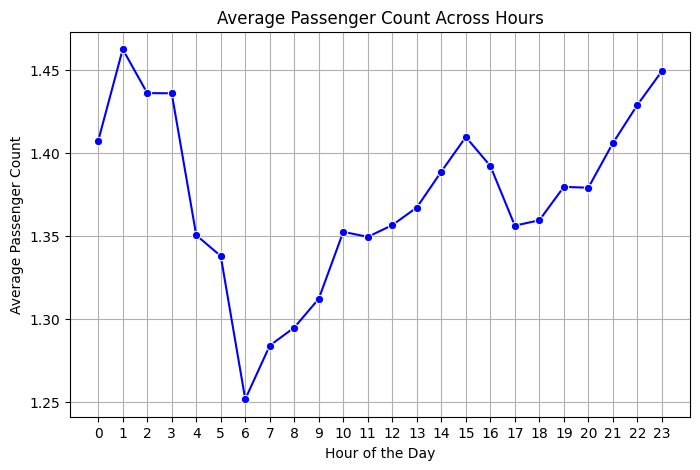

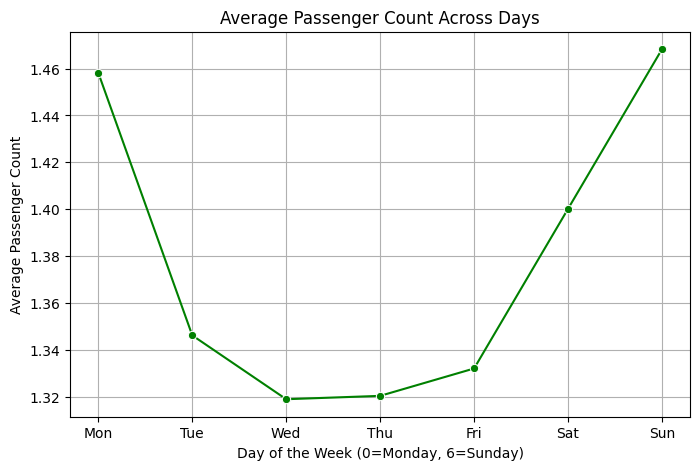

In [305]:
# See how passenger count varies across hours and days
# average_passenger_count_per_hours_day = merged_df.groupby('pickup_hours')['passenger_count'].sum().reset_index()
# average_passenger_count_per_weekday = merged_df.groupby('weekly_pickups')['passenger_count'].sum().reset_index()
# print("Average passenger count per hour of the day:")
# print(average_passenger_count_per_hours_day)
# print("\nAverage passenger count per weekday:")
# print(average_passenger_count_per_weekday)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = merged_df.copy()

# 🛠️ Extract Time Features
# df['pickup_hour'] = df['pickup_datetime'].dt.hour  # Hour of the day (0-23)
# df['pickup_day'] = df['pickup_datetime'].dt.dayofweek  # Day of the week (0=Monday, 6=Sunday)

# 🚖 Compute Average Passenger Count per Hour
passenger_by_hour = df.groupby('pickup_hours')['passenger_count'].mean().reset_index()

# 🚖 Compute Average Passenger Count per Day
passenger_by_day = df.groupby('weekly_pickups')['passenger_count'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x=passenger_by_hour['pickup_hours'], y=passenger_by_hour['passenger_count'], marker='o', color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Average Passenger Count")
plt.title("Average Passenger Count Across Hours")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.lineplot(x=passenger_by_day['weekly_pickups'], y=passenger_by_day['passenger_count'], marker='o', color='green')
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Passenger Count")
plt.title("Average Passenger Count Across Days")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()





**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [306]:
# How does passenger count vary across zones
passenger_count_across_zones = merged_df.groupby('zone')['passenger_count'].mean().reset_index()
print("Average passenger count across zones:")
print(passenger_count_across_zones)


Average passenger count across zones:
                        zone  passenger_count
0              Alphabet City         1.396739
1    Arrochar/Fort Wadsworth         3.000000
2                    Astoria         1.193548
3                 Auburndale         1.000000
4               Baisley Park         1.522727
..                       ...              ...
144                Woodhaven         1.000000
145                 Woodside         1.230769
146       World Trade Center         1.458716
147           Yorkville East         1.314319
148           Yorkville West         1.352002

[149 rows x 2 columns]


In [308]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
zones_with_trips['average_passenger_count'] = zones_with_trips['zone'].map(passenger_count_across_zones.set_index('zone')['passenger_count'])
zones_with_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,PULocationID,borough,geometry,Total Trips,average_passenger_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",4.0,2.250000
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",0.0,NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",0.0,NaN
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",184.0,1.396739
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",0.0,NaN


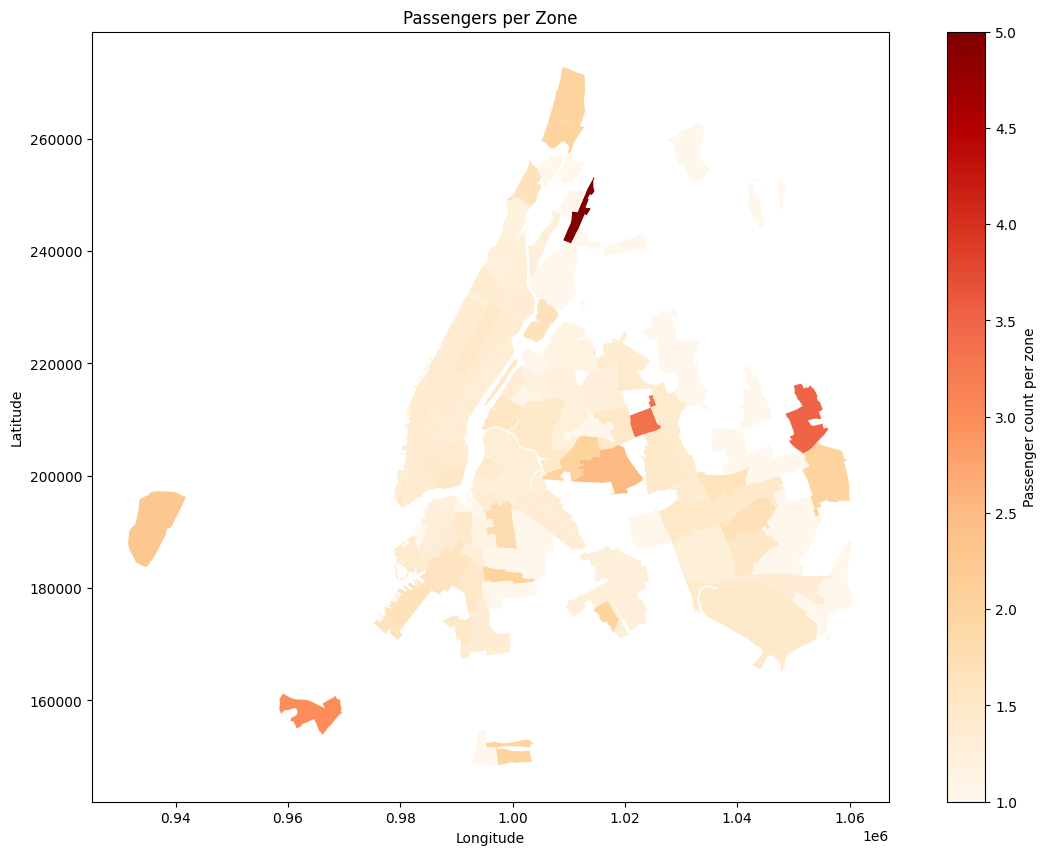

In [309]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the choropleth map
zones_with_trips.plot(column='average_passenger_count', cmap='OrRd', legend=True,
                      legend_kwds={'label': "Passenger count per zone"}, ax=ax)

# Add title and labels
plt.title('Passengers per Zone')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

Find out how often surcharges/extra charges are applied to understand their prevalance

Percentage of trips with surcharges: 98.11%
Percentage of trips without surcharges: 1.89%


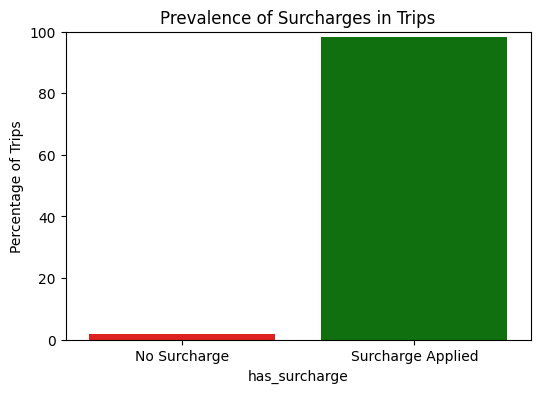

In [317]:
df = merged_df.copy()

df['has_surcharge'] = (df['extra'] > 0) | (df['congestion_surcharge'] > 0)

surcharge_counts = df['has_surcharge'].value_counts(normalize=True) * 100  # Convert to percentage

print(f"Percentage of trips with surcharges: {surcharge_counts[True]:.2f}%")
print(f"Percentage of trips without surcharges: {surcharge_counts[False]:.2f}%")

plt.figure(figsize=(6, 4))
sns.barplot(x=surcharge_counts.index, y=surcharge_counts.values, palette=['red', 'green'])
plt.xticks([0, 1], ["No Surcharge", "Surcharge Applied"])
plt.ylabel("Percentage of Trips")
plt.title("Prevalence of Surcharges in Trips")
plt.ylim(0, 100)
plt.show()


**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

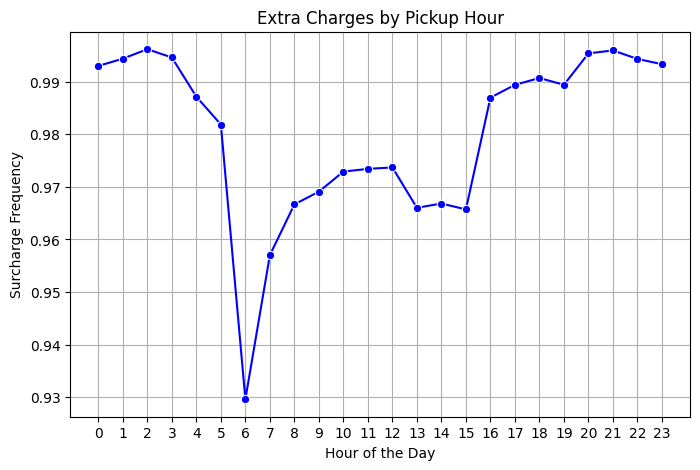

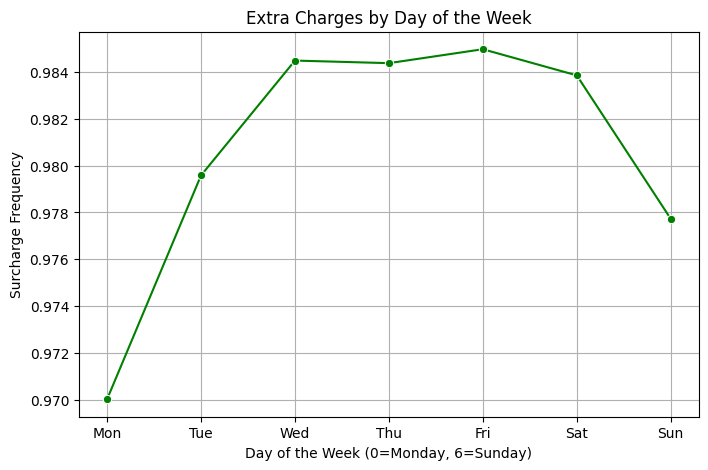

In [316]:
# How often is each surcharge applied?

df = merged_df.copy()

df['has_surcharge'] = (df['extra'] > 0) | (df['congestion_surcharge'] > 0)

pickup_surcharge = df.groupby('PULocationID')['has_surcharge'].mean().sort_values(ascending=False).reset_index()
pickup_surcharge.columns = ['PULocationID', 'surcharge_pct']

dropoff_surcharge = df.groupby('DOLocationID')['has_surcharge'].mean().sort_values(ascending=False).reset_index()
dropoff_surcharge.columns = ['DOLocationID', 'surcharge_pct']

hourly_surcharge = df.groupby('pickup_hours')['has_surcharge'].mean().reset_index()

daily_surcharge = df.groupby('weekly_pickups')['has_surcharge'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x=hourly_surcharge['pickup_hours'], y=hourly_surcharge['has_surcharge'], marker='o', color='blue')
plt.xlabel("Hour of the Day")
plt.ylabel("Surcharge Frequency")
plt.title("Extra Charges by Pickup Hour")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
sns.lineplot(x=daily_surcharge['weekly_pickups'], y=daily_surcharge['has_surcharge'], marker='o', color='green')
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Surcharge Frequency")
plt.title("Extra Charges by Day of the Week")
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### Recommendations for Optimizing Routing and Dispatching

Based on the demand patterns and operational inefficiencies identified through the EDA, here are some recommendations to optimize routing and dispatching:

1.  **Dynamic Dispatching Based on Real-Time Demand:**
    *   Implement a real-time dispatching system that adjusts taxi allocation based on current demand patterns.
    *   Use machine learning models to predict demand in different zones at different times of the day, and proactively dispatch taxis to those areas.

2.  **Optimized Routing Based on Traffic Conditions:**
    *   Integrate real-time traffic data into the routing system to avoid congested areas and reduce trip durations.
    *   Use algorithms that consider both distance and estimated travel time to suggest the most efficient routes.

3.  **Incentivize Drivers to Serve High-Demand Zones:**
    *   Offer bonuses or incentives to drivers who pick up passengers in zones with high pickup/dropoff ratios or during peak hours.
    *   Use a dynamic pricing model to encourage drivers to serve areas with high demand and limited supply.

4.  **Reduce Idle Time:**
    *   Use predictive models to identify areas where taxis are likely to be idle and dispatch them to nearby high-demand zones.
    *   Implement a system that alerts drivers when they are in an area with low demand and suggests alternative locations.

5.  **Optimize Airport Dispatching:**
    *   Use real-time flight arrival data to predict demand at airports and dispatch taxis accordingly.
    *   Implement a virtual queueing system to manage taxi dispatch at airports and reduce wait times for both passengers and drivers.

6.  **Improve Route Planning:**
    *   Use historical trip data to identify common routes and optimize them for efficiency.
    *   Consider factors such as traffic patterns, road closures, and construction when planning routes.

7.  **Dynamic Pricing Strategies:**
    *   Implement surge pricing during peak hours and in high-demand zones to balance supply and demand.
    *   Offer discounts or promotions during off-peak hours to incentivize ridership.

8.  **Data-Driven Decision Making:**
    *   Continuously monitor key performance indicators (KPIs) such as trip duration, idle time, and customer satisfaction to identify areas for improvement.
    *   Use A/B testing to evaluate the effectiveness of different routing and dispatching strategies.

By implementing these recommendations, you can optimize routing and dispatching, reduce operational inefficiencies, and improve customer satisfaction. This data-driven approach ensures that your taxi fleet is well-positioned to meet the dynamic demands of New York City's transportation landscape.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### Strategic Cab Positioning Based on Trip Trends

To strategically position cabs across different zones, consider the following recommendations based on the insights from your trip trend analysis:

1.  **Identify High-Demand Zones:**
    *   Focus on commercial hubs (e.g., Midtown, Financial District) and transit centers (e.g., airports, train stations) as primary deployment zones.
    *   Use historical data to identify zones with consistently high pickup counts.

2.  **Align with Temporal Trends:**
    *   **Hourly Patterns:**
        *   Increase cab availability during rush hours (7-9 AM and 5-7 PM) in zones with high commuter traffic.
        *   Adjust fleet size based on hourly trends, reducing the number of cabs during off-peak hours to minimize idle time.
    *   **Daily Patterns:**
        *   Deploy more cabs on weekdays to accommodate higher commuter traffic.
        *   Adjust strategies for weekends, considering different peak times and demand patterns.
    *   **Monthly Trends:**
        *   Increase cab availability during months with higher ridership, such as tourist season or months with major events.

3.  **Optimize Based on Pickup/Dropoff Ratios:**
    *   Identify zones with high pickup/dropoff ratios to strategically position cabs where demand exceeds supply.
    *   Use a dynamic dispatching system to allocate cabs to zones with imbalanced pickup and dropoff activity.

4.  **Consider Trip Characteristics:**
    *   Optimize routes to avoid slow zones and reduce trip durations, especially during peak hours.
    *   Use predictive models to anticipate demand based on factors such as weather, events, and holidays.

5.  **Implement Dynamic Dispatching:**
    *   Use a real-time dispatching system that adjusts cab allocation based on current demand patterns.
    *   Use machine learning models to predict demand in different zones at different times of the day, and proactively dispatch cabs to those areas.

6.  **Incentivize Drivers:**
    *   Offer bonuses or incentives to drivers who pick up passengers in zones with high pickup/dropoff ratios or during peak hours.
    *   Use a dynamic pricing model to encourage drivers to serve areas with high demand and limited supply.

7.  **Monitor and Adjust:**
    *   Continuously monitor key performance indicators (KPIs) such as trip duration, idle time, and customer satisfaction to identify areas for improvement.
    *   Use A/B testing to evaluate the effectiveness of different cab positioning strategies.

By implementing these recommendations, you can strategically position cabs across different zones to make the best use of insights uncovered by analyzing trip trends across time, days, and months. This data-driven approach ensures that your taxi fleet is well-positioned to meet the dynamic demands of New York City's transportation landscape.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### Data-Driven Adjustments to Pricing Strategy

Based on the analysis of tip percentages, distances, passenger counts, and pickup times, here are some data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates:

1.  **Distance-Based Pricing:**
    *   **Insight:** Average tip percentage varies with trip distance.
    *   **Adjustment:** Implement a dynamic pricing model that adjusts the base fare based on trip distance. For example, increase the base fare for longer trips, as they tend to yield higher tip percentages.

2.  **Passenger Count-Based Pricing:**
    *   **Insight:** Average tip percentage varies with passenger count.
    *   **Adjustment:** Consider implementing a surcharge for trips with higher passenger counts, as they may indicate shared rides or peak-time dynamics influencing pricing.

3.  **Time-Based Pricing:**
    *   **Insight:** Average tip percentage varies with pickup time.
    *   **Adjustment:** Implement surge pricing during peak hours (e.g., rush hours, weekends) when demand is high and supply is limited. Offer discounts or promotions during off-peak hours to incentivize ridership.

4.  **Dynamic Pricing Model:**
    *   **Insight:** Demand and tip percentages vary based on multiple factors.
    *   **Adjustment:** Implement a dynamic pricing model that considers all relevant factors (distance, passenger count, pickup time, location, etc.) to optimize pricing in real-time.

5.  **Competitive Pricing:**
    *   **Insight:** Maintaining competitive rates is crucial for attracting customers.
    *   **Adjustment:** Continuously monitor competitor pricing and adjust your rates accordingly. Offer discounts or promotions to match or beat competitor prices.

6.  **Incentivize Drivers:**
    *   **Insight:** Higher tip percentages can incentivize drivers to provide better service.
    *   **Adjustment:** Implement a system that rewards drivers with higher tip percentages, such as bonuses or incentives for maintaining high customer satisfaction ratings.

7.  **Transparency:**
    *   **Insight:** Customers appreciate transparency in pricing.
    *   **Adjustment:** Clearly communicate pricing policies and any surcharges or discounts to customers before they book a ride.

8.  **A/B Testing:**
    *   **Insight:** Different pricing strategies may work better in different situations.
    *   **Adjustment:** Use A/B testing to evaluate the effectiveness of different pricing strategies and continuously optimize your pricing model.

By implementing these data-driven adjustments to the pricing strategy, you can maximize revenue while maintaining competitive rates and improving customer satisfaction. This approach ensures that your taxi service is well-positioned to meet the dynamic demands of New York City's transportation landscape.